In [1]:
from IPython.display import display, HTML, FileLink
display(HTML("<style>.container { width:60% !important; }</style>"))

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from baseball_id import Lookup
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore


plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'serif'

In [8]:
drs_2023 = pd.read_csv("drs_2023.csv")
drs_2024 = pd.read_csv("drs_2024.csv")

drs_2023["Season"] = 2023
drs_2024["Season"] = 2024

drs_all = pd.concat([drs_2023, drs_2024], ignore_index=True)

drs_all = drs_all[["Name", "Season", "Inn", "DRS"]].copy()
drs_all.columns = ["Player", "Season", "Innings", "DRS"]

print(drs_all.sort_values(by="DRS", ascending=False).head(10))

               Player  Season  Innings  DRS
337        Matt Olson    2024   1443.1   13
157    Carlos Santana    2023   1152.2   11
342    Michael Toglia    2024    890.2   10
75   Christian Walker    2023   1309.1    9
174        Matt Olson    2023   1426.0    8
331  Ryan Mountcastle    2024    981.1    8
181    Carlos Santana    2024   1250.0    8
287        Joey Gallo    2024    477.2    7
179  Christian Walker    2024   1104.1    7
170       Pete Alonso    2023   1256.2    6


###### Quickly investigating 'do I want a minimum number of innings?' just in case I want to include it in the future...

In [4]:
drs_all = drs_all[drs_all['Innings'] > 0].copy()
drs_all['DRS_per_1000_inn'] = drs_all['DRS'] / drs_all['Innings'] * 1000

print(drs_all.sort_values(by="DRS_per_1000_inn", ascending=False).head(10))

              Player  Season  Innings  DRS  DRS_per_1000_inn
9     Hanser Alberto    2023      6.0    1        166.666667
29   Victor Caratini    2023      9.0    1        111.111111
183    Gabriel Arias    2024     15.0    1         66.666667
21     Miguel Vargas    2023     15.0    1         66.666667
189        Mike Ford    2024     17.0    1         58.823529
1        Andy Ibáñez    2023     17.2    1         58.139535
26       Nicky Lopez    2023     18.0    1         55.555556
209   Jhonkensy Noel    2024     39.0    2         51.282051
262     Kevin Newman    2024     22.0    1         45.454545
269     Mark Vientos    2024     25.0    1         40.000000


In [5]:
drs_all = drs_all[drs_all['Innings'] > 100].copy()
drs_all['DRS_per_1000_inn'] = drs_all['DRS'] / drs_all['Innings'] * 1000

print(drs_all.sort_values(by="DRS_per_1000_inn", ascending=False).head(10))

             Player  Season  Innings  DRS  DRS_per_1000_inn
279    Yuli Gurriel    2024    101.0    2         19.801980
2         Jake Lamb    2023    104.0    2         19.230769
205   Alec Burleson    2024    117.0    2         17.094017
281    Bobby Dalbec    2024    122.1    2         16.380016
287      Joey Gallo    2024    477.2    7         14.668902
134   Wilmer Flores    2023    415.0    6         14.457831
298     Tyler Nevin    2024    211.0    3         14.218009
180    Bligh Madris    2024    165.2    2         12.106538
139  Cody Bellinger    2023    421.2    5         11.870845
342  Michael Toglia    2024    890.2   10         11.233431


In [10]:
drs_all = drs_all[drs_all['Innings'] > 200].copy()
drs_all['DRS_per_1000_inn'] = drs_all['DRS'] / drs_all['Innings'] * 1000

print(drs_all.sort_values(by="DRS_per_1000_inn", ascending=False).head(10))

             Player  Season  Innings  DRS  DRS_per_1000_inn
287      Joey Gallo    2024    477.2    7         14.668902
134   Wilmer Flores    2023    415.0    6         14.457831
298     Tyler Nevin    2024    211.0    3         14.218009
139  Cody Bellinger    2023    421.2    5         11.870845
342  Michael Toglia    2024    890.2   10         11.233431
133   Justin Turner    2023    289.1    3         10.377032
157  Carlos Santana    2023   1152.2   11          9.546954
337      Matt Olson    2024   1443.1   13          9.008385
130     Matt Mervis    2023    226.1    2          8.845644
147  Mike Moustakas    2023    341.2    3          8.792497


###### done with the investigating for now

In [11]:
drs_2023 = drs_all[drs_all['Season'] == 2023].copy()
drs_2024 = drs_all[drs_all['Season'] == 2024].copy()

print("2023 TOP 10 DRS")
print(drs_2023.sort_values(by="DRS", ascending=False).head(10))
print("\n2024 TOP 10 DRS")
print(drs_2024.sort_values(by="DRS", ascending=False).head(10))

2023 TOP 10 DRS
               Player  Season  Innings  DRS  DRS_per_1000_inn
157    Carlos Santana    2023   1152.2   11          9.546954
75   Christian Walker    2023   1309.1    9          6.874952
174        Matt Olson    2023   1426.0    8          5.610098
170       Pete Alonso    2023   1256.2    6          4.776310
134     Wilmer Flores    2023    415.0    6         14.457831
165     Dominic Smith    2023   1244.2    5          4.018647
139    Cody Bellinger    2023    421.2    5         11.870845
156  Paul Goldschmidt    2023   1153.1    3          2.601682
147    Mike Moustakas    2023    341.2    3          8.792497
133     Justin Turner    2023    289.1    3         10.377032

2024 TOP 10 DRS
               Player  Season  Innings  DRS  DRS_per_1000_inn
337        Matt Olson    2024   1443.1   13          9.008385
342    Michael Toglia    2024    890.2   10         11.233431
181    Carlos Santana    2024   1250.0    8          6.400000
331  Ryan Mountcastle    2024    981.

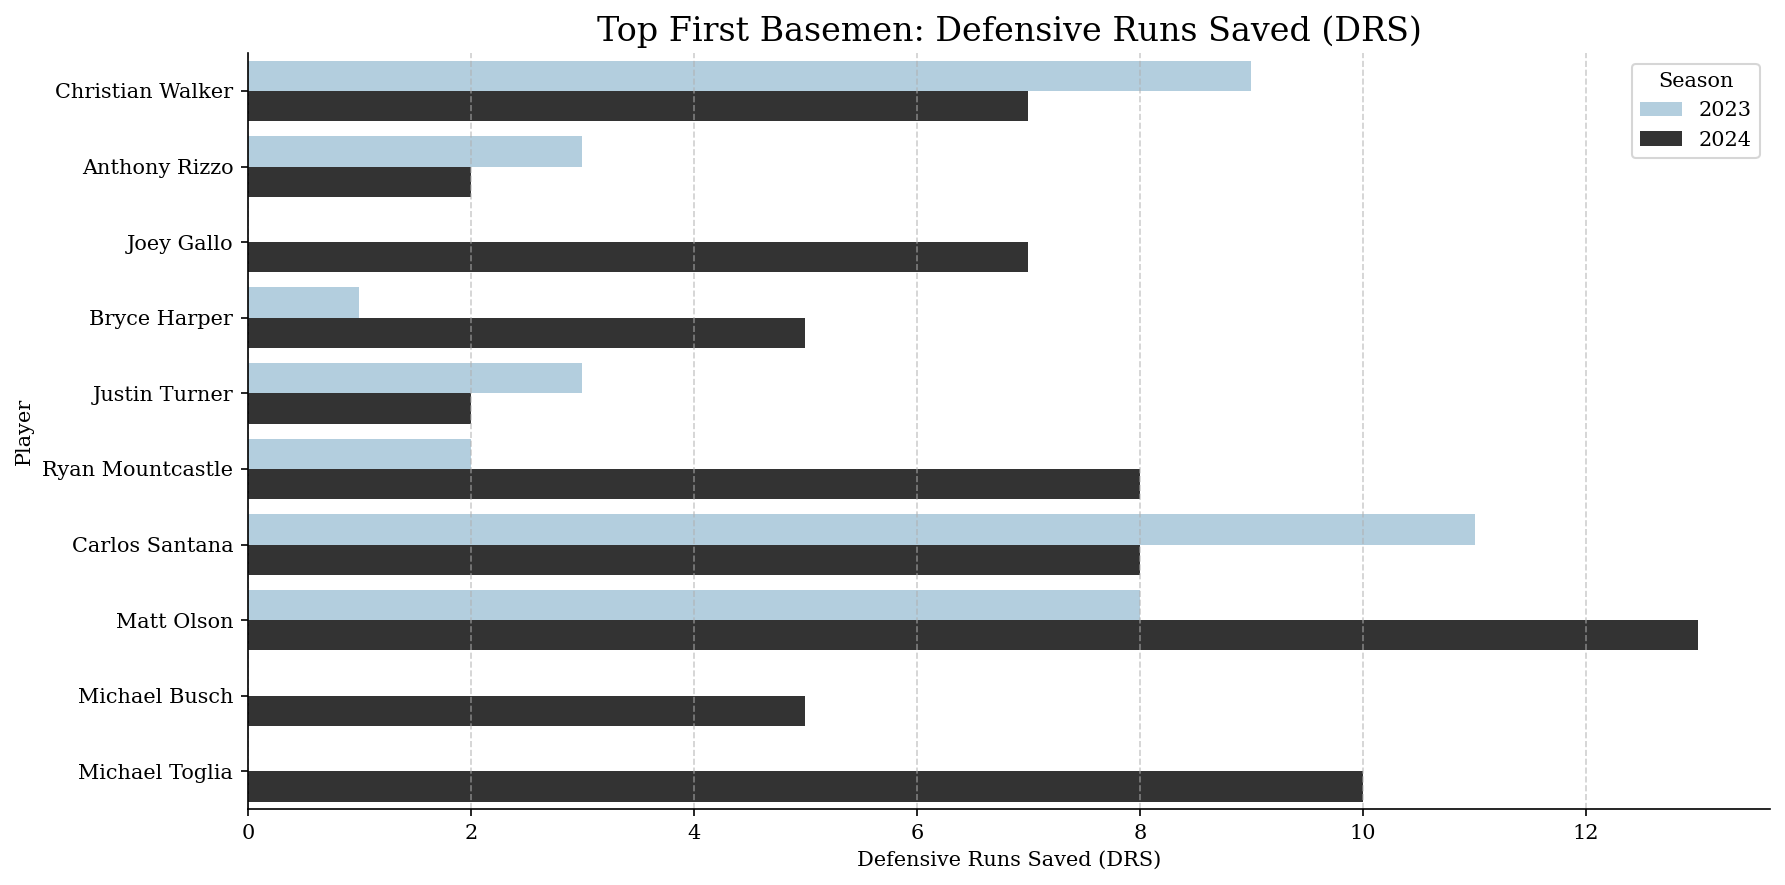

In [12]:
top_players = drs_all.groupby("Player")["DRS"].sum().sort_values(ascending=False).head(10).index
top_drs = drs_all[drs_all["Player"].isin(top_players)].copy()

player_order = list(top_players[::-1])
player_to_y = {player: i for i, player in enumerate(player_order)}
top_drs["yval"] = top_drs["Player"].map(player_to_y)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_drs, y="Player", x="DRS", hue=top_drs["Season"], palette="Blues_d", native_scale=True)

plt.title("Top First Basemen: Defensive Runs Saved (DRS)", fontsize=16)
plt.xlabel("Defensive Runs Saved (DRS)")
plt.ylabel("Player")
plt.grid(axis="x", linestyle="--", alpha=0.6)

for spine in ["right", "top"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

#### OK, defensive runs saved is up there. I like the bar plot (though I need to define edgecolor so players with 0 values will display something), and decisions can be made / discussions can be had in terms of seasons and time played - how this rolls into the concept of the 'current' best player, or potential near-future best...

#### For now, I want to try a different plot  



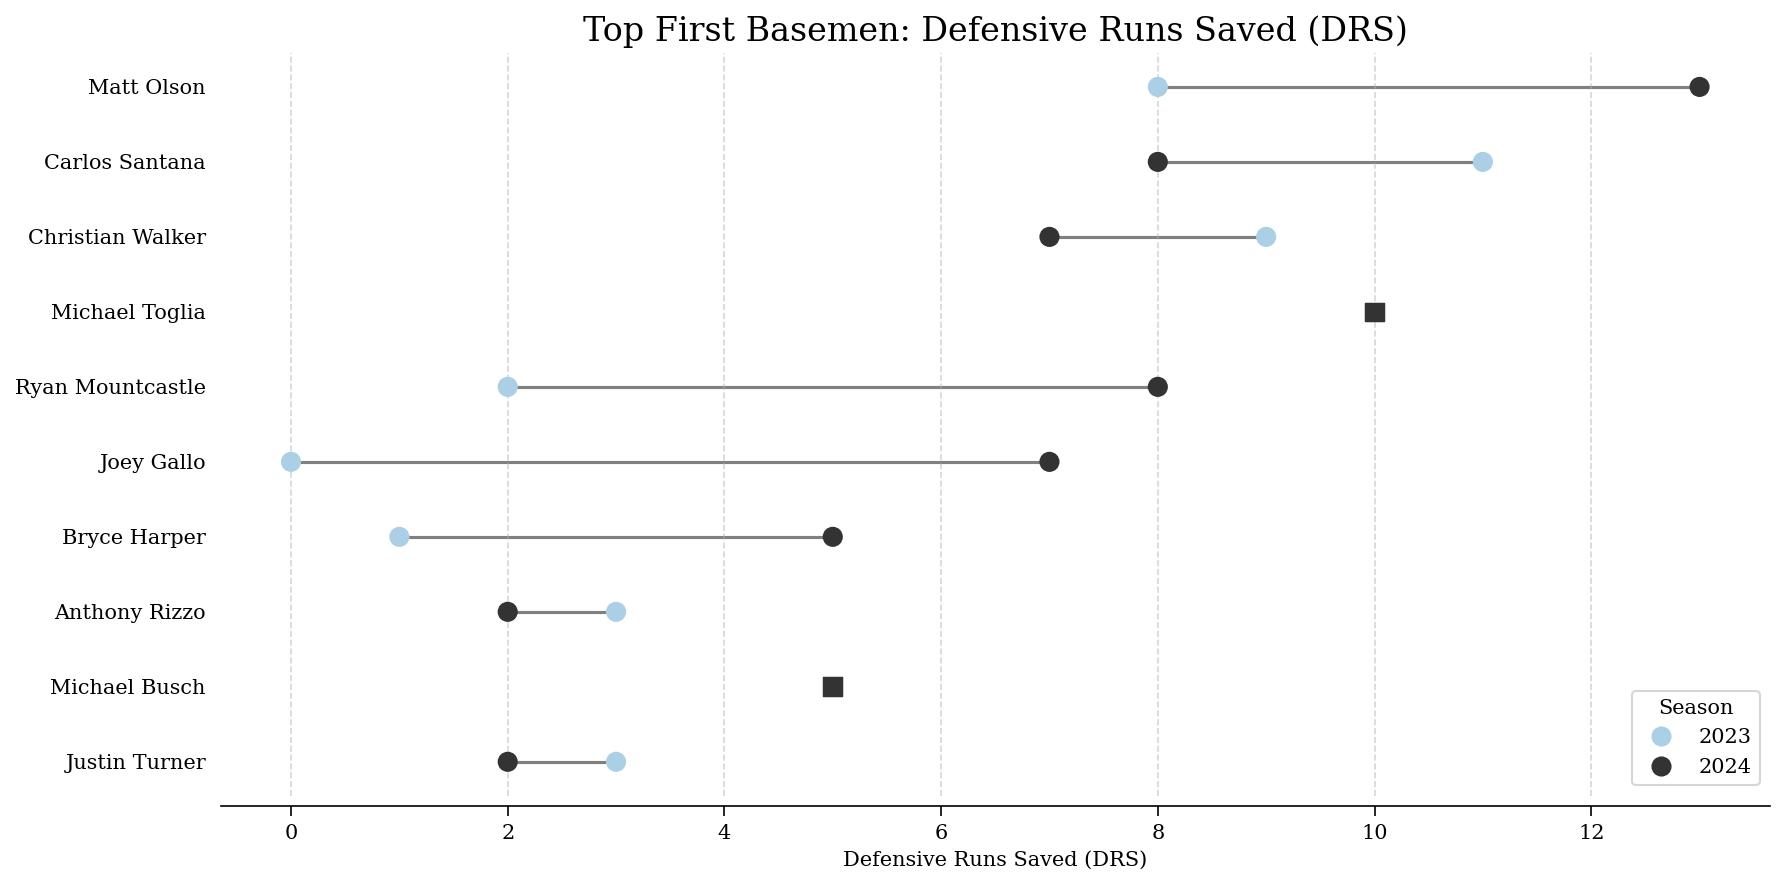

In [13]:
player_counts = top_drs["Player"].value_counts()
multi_season_players = player_counts[player_counts == 2].index
single_season_players = player_counts[player_counts == 1].index

plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=top_drs[top_drs["Player"].isin(multi_season_players)],
    x="DRS", y="yval", hue=top_drs["Season"], palette="Blues_d", marker='o', edgecolor=None, s=80, zorder=2
)

sns.scatterplot(
    data=top_drs[top_drs["Player"].isin(single_season_players)],
    x="DRS", y="yval", hue=top_drs["Season"], palette="Blues_d", marker='s', edgecolor=None, s=80, zorder=2, legend=False
)

for player in multi_season_players:
    row = top_drs[top_drs["Player"] == player].sort_values("Season")
    y = player_to_y[player]
    plt.plot(row["DRS"], [y, y], color="gray", zorder=1, linewidth=1.5)

plt.yticks(ticks=list(player_to_y.values()), labels=list(player_to_y.keys()))

plt.title("Top First Basemen: Defensive Runs Saved (DRS)", fontsize=16)
plt.xlabel("Defensive Runs Saved (DRS)")
plt.ylabel("")

plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.legend(title="Season", loc="lower right")

for spine in ["left", "right", "top"]:
    plt.gca().spines[spine].set_visible(False)
plt.gca().spines["bottom"].set_position(("outward", 5))
plt.tick_params(axis='x', direction='out', length=5)
plt.tick_params(axis='y', left=False)

plt.tight_layout()
plt.show()

#### I personally think it's a great-looking plot, and quickly conveys the info

In [14]:
oaa_2023 = pd.read_csv('oaa_2023.csv')
oaa_2024 = pd.read_csv('oaa_2024.csv')

print(oaa_2023.head())
print("\n",oaa_2023.columns)

  last_name, first_name  player_id display_team_name  year  \
0           Abreu, José     547989            Astros  2023   
1          Alonso, Pete     624413              Mets  2023   
2            Bell, Josh     605137               ---  2023   
3            Bohm, Alec     664761          Phillies  2023   
4        Casas, Triston     671213           Red Sox  2023   

  primary_pos_formatted  fielding_runs_prevented  outs_above_average  \
0                    1B                       -5                  -6   
1                    1B                        0                  -1   
2                    1B                       -3                  -3   
3                    3B                       -5                  -6   
4                    1B                       -8                 -10   

   outs_above_average_infront  outs_above_average_lateral_toward3bline  \
0                           0                                       -5   
1                           2                 

In [15]:
oaa_2023['Season'] = 2023
oaa_2024['Season'] = 2024

oaa_all = pd.concat([oaa_2023, oaa_2024], ignore_index=True)

oaa_all = oaa_all[['Season', 'last_name, first_name', 'display_team_name', 'fielding_runs_prevented', 'outs_above_average']]

oaa_all.columns = ['Season', 'Player', 'Team', 'Fielding_Runs', 'OAA']

oaa_all['Player'] = oaa_all['Player'].apply(lambda x: ' '.join(x.split(', ')[::-1]))

print(oaa_all.head())

   Season         Player      Team  Fielding_Runs  OAA
0    2023     José Abreu    Astros             -5   -6
1    2023    Pete Alonso      Mets              0   -1
2    2023      Josh Bell       ---             -3   -3
3    2023      Alec Bohm  Phillies             -5   -6
4    2023  Triston Casas   Red Sox             -8  -10


In [16]:
oaa_sorted = oaa_all.sort_values(by='OAA', ascending=False)

print(oaa_sorted.head(10))

    Season            Player       Team  Fielding_Runs  OAA
64    2024    Carlos Santana      Twins             11   14
76    2024  Christian Walker    D-backs             10   13
36    2023  Christian Walker    D-backs              9   12
52    2024      Bryce Harper   Phillies              6    8
55    2024    Nathaniel Lowe    Rangers              5    7
27    2023     Anthony Rizzo    Yankees              5    6
22    2023       Josh Naylor  Guardians              4    5
19    2023    Nathaniel Lowe    Rangers              4    5
11    2023   Freddie Freeman    Dodgers              3    4
24    2023      Ryan O'Hearn    Orioles              3    4


In [17]:
oaa_2023 = oaa_sorted[oaa_sorted['Season'] == 2023].copy()
oaa_2023['OAA_percentile'] = oaa_2023['OAA'].rank(pct=True) * 100

oaa_2024 = oaa_sorted[oaa_sorted['Season'] == 2024].copy()
oaa_2024['OAA_percentile'] = oaa_2024['OAA'].rank(pct=True) * 100

print(oaa_2024[['Player', 'Team', 'OAA', 'OAA_percentile']].head(10))

                Player       Team  OAA  OAA_percentile
64      Carlos Santana      Twins   14          100.00
76    Christian Walker    D-backs   13           97.50
52        Bryce Harper   Phillies    8           95.00
55      Nathaniel Lowe    Rangers    7           92.50
61          Matt Olson     Braves    4           90.00
49          Joey Gallo  Nationals    3           85.00
62  Vinnie Pasquantino     Royals    3           85.00
44    Jake Cronenworth     Padres    3           85.00
42       Michael Busch       Cubs    2           76.25
58    Ryan Mountcastle    Orioles    2           76.25


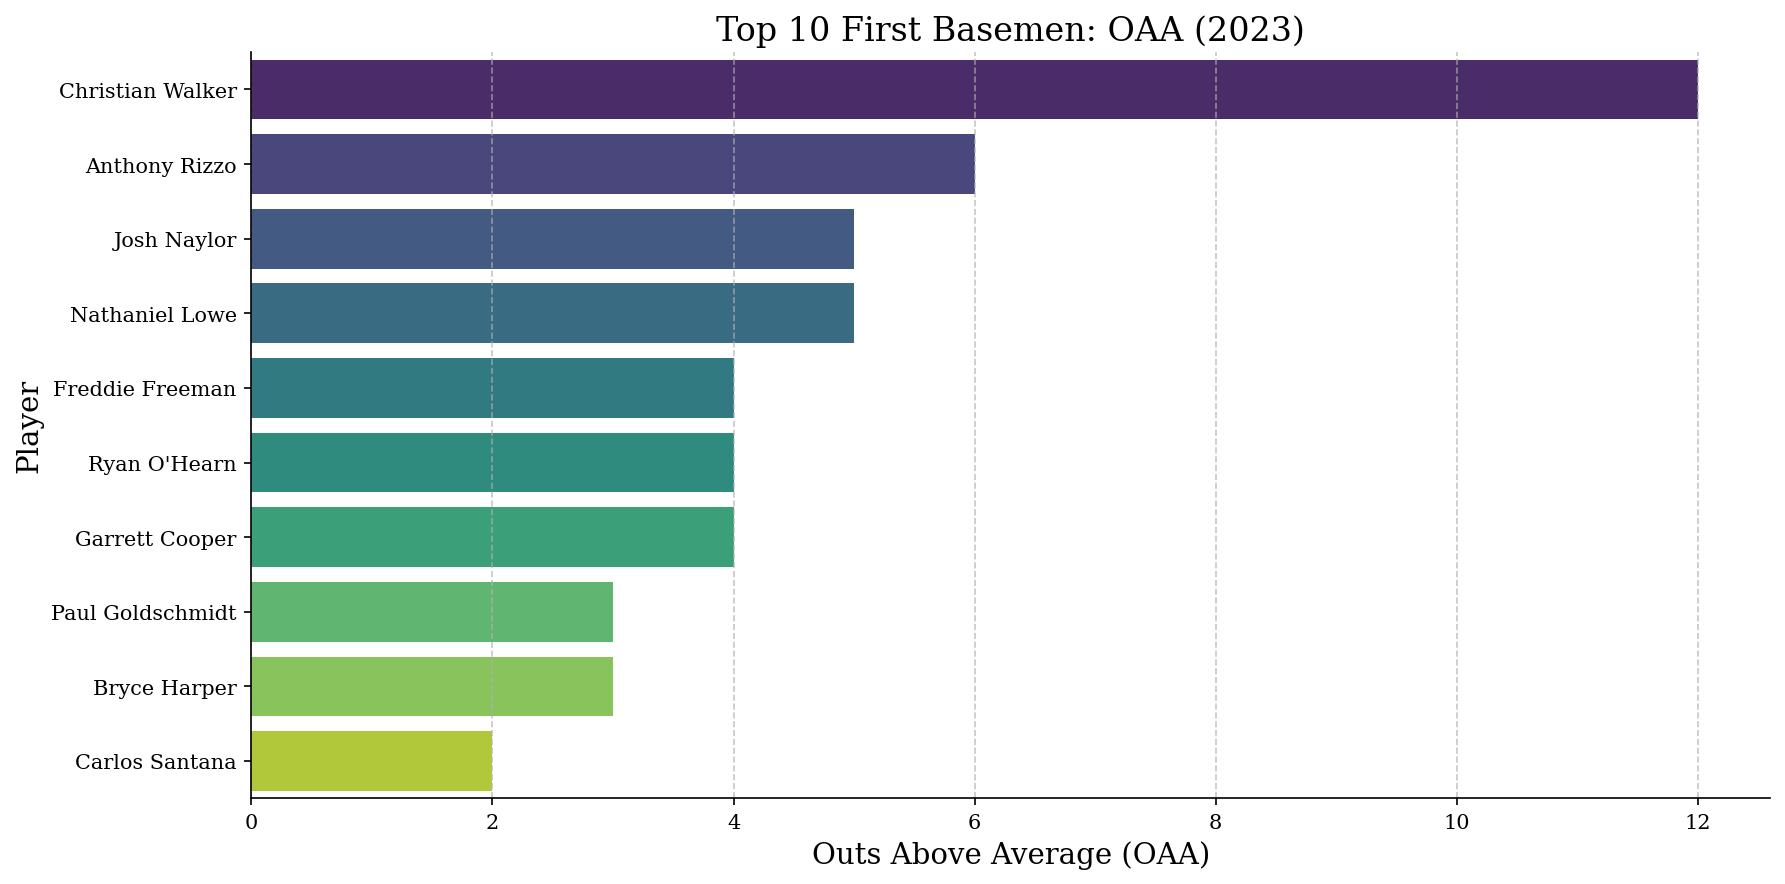

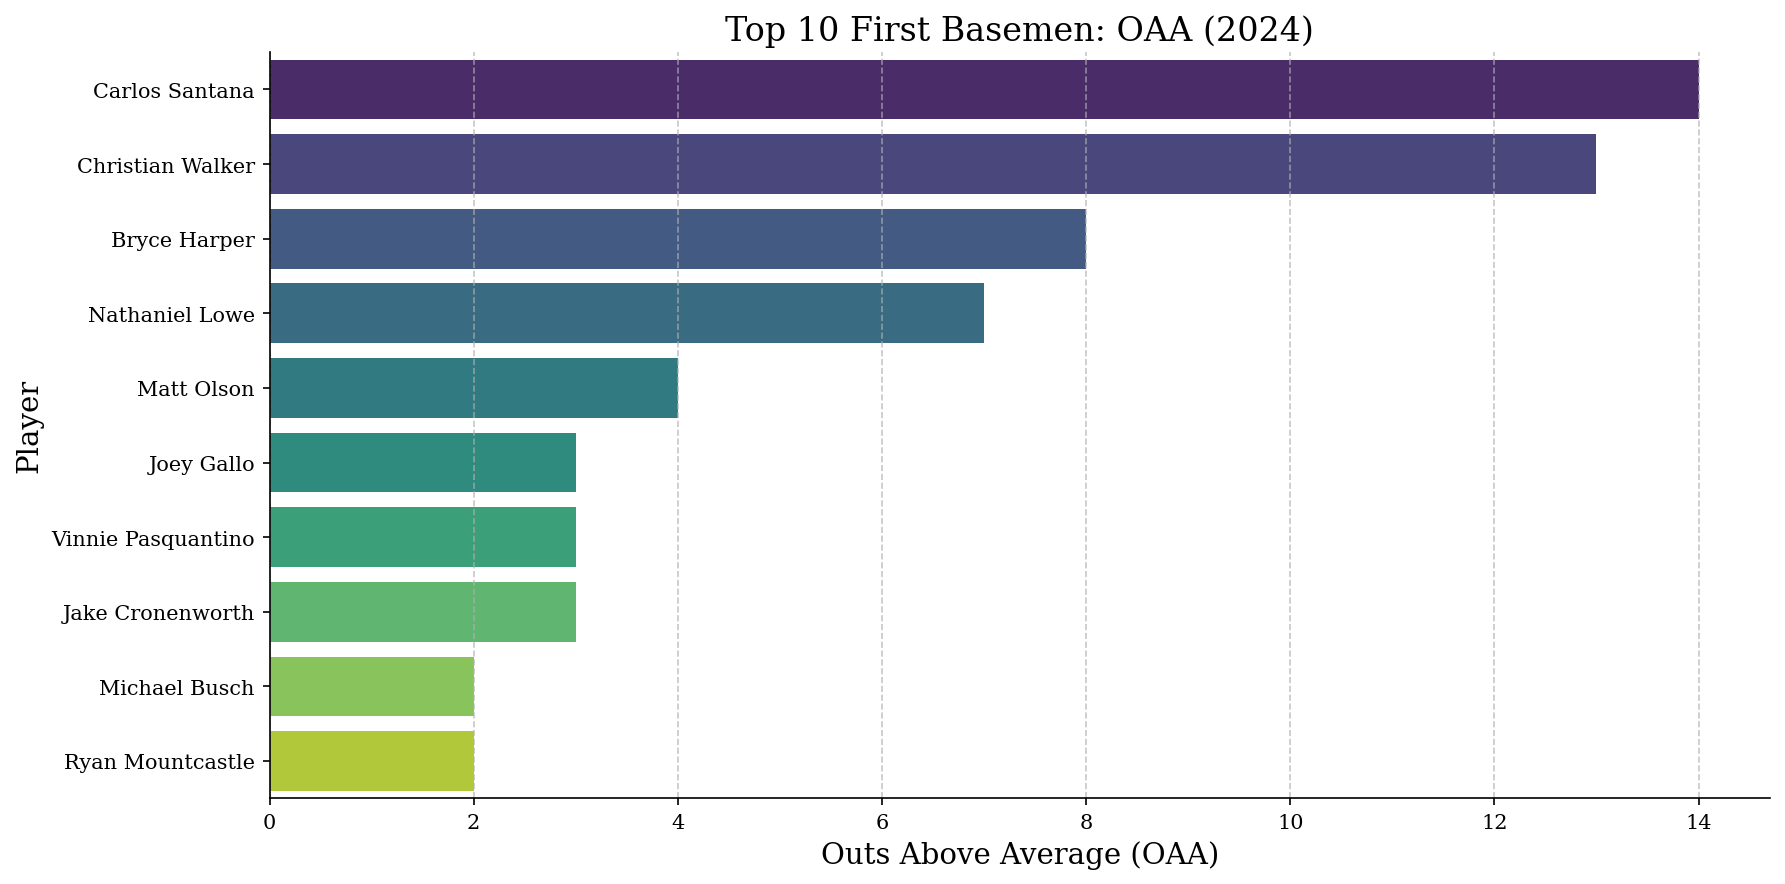

In [18]:
top_oaa_2023 = oaa_2023.head(10)

plt.figure(figsize=(12, 6))

sns.barplot(data=top_oaa_2023, y='Player', hue='Player',x='OAA', palette='viridis', orient='h', legend=False)

plt.title('Top 10 First Basemen: OAA (2023)', fontsize=16)
plt.xlabel('Outs Above Average (OAA)', fontsize=14)
plt.ylabel('Player', fontsize=14)

for spine in ["right", "top"]:
    plt.gca().spines[spine].set_visible(False)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



top_oaa_2024 = oaa_2024.head(10)

plt.figure(figsize=(12, 6))

sns.barplot(data=top_oaa_2024, y='Player', hue='Player',x='OAA', palette='viridis', orient='h', legend=False)

plt.title('Top 10 First Basemen: OAA (2024)', fontsize=16)
plt.xlabel('Outs Above Average (OAA)', fontsize=14)
plt.ylabel('Player', fontsize=14)

for spine in ["right", "top"]:
    plt.gca().spines[spine].set_visible(False)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### This definitely needs to be cleaned up. I tried the one season, and just quickly copy/pasted to make a plot of t'other season (and I always love the viridis colormap), but at the very least it needs a side-by-side with shared title, if not a 'filled thermometer' type bar plot, or the 'connected dot' style I used earlier. 

#### As of now, it's just a very straightforward top 10 in each season.


### Of course, the real fun (and thoroughness) starts when we begin combining metrics.

In [19]:
defense_combined = oaa_all.merge(
    drs_all,
    on=['Player', 'Season'],
    how='outer'                    # I'll use 'outer' here so a player is kept, even if they're only in one df
)

defense_combined.dropna(subset=['OAA', 'DRS'], how='all', inplace=True)

print(defense_combined.head(10))

   Season            Player      Team  Fielding_Runs   OAA  Innings  DRS  \
0    2023        José Abreu    Astros           -5.0  -6.0   1184.0   -1   
1    2023       Pete Alonso      Mets            0.0  -1.0   1256.2    6   
2    2023         Josh Bell       ---           -3.0  -3.0    485.0   -5   
3    2023         Alec Bohm  Phillies           -5.0  -6.0    553.0   -2   
4    2023     Triston Casas   Red Sox           -8.0 -10.0   1037.0   -4   
5    2023    Garrett Cooper       ---            3.0   4.0    651.0    1   
6    2023         C.J. Cron       ---            1.0   2.0    502.0    0   
7    2023  Jake Cronenworth    Padres           -2.0  -3.0    844.0    1   
8    2023        Yandy Díaz      Rays           -5.0  -6.0    986.1    0   
9    2023     Wilmer Flores    Giants            1.0   1.0    415.0    6   

   DRS_per_1000_inn  
0         -0.844595  
1          4.776310  
2        -10.309278  
3         -3.616637  
4         -3.857281  
5          1.536098  
6        

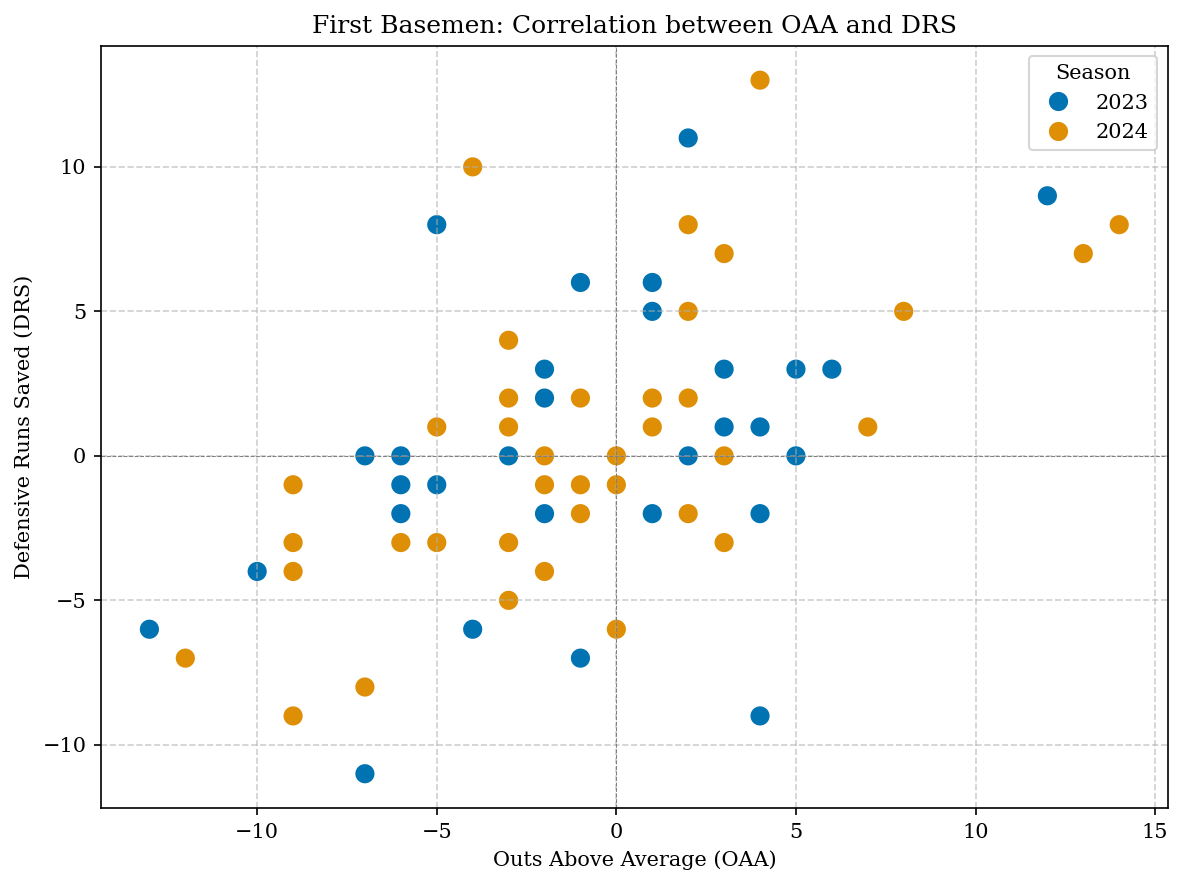

In [20]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=defense_combined,x='OAA',y='DRS',hue='Season',palette='colorblind',s=100)

plt.title('First Basemen: Correlation between OAA and DRS')
plt.xlabel('Outs Above Average (OAA)')
plt.ylabel('Defensive Runs Saved (DRS)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [21]:
corr = defense_combined[['OAA', 'DRS']].dropna().corr(method='pearson')
print("Correlation matrix:\n", corr)

Correlation matrix:
           OAA       DRS
OAA  1.000000  0.554584
DRS  0.554584  1.000000


In [22]:
corr = defense_combined[['OAA', 'DRS']].dropna().corr(method='spearman')
print("Correlation matrix:\n", corr)

Correlation matrix:
          OAA      DRS
OAA  1.00000  0.54536
DRS  0.54536  1.00000


##### Very nice to see agreement between the two methods - and it's not exactly surprising that DRS and OAA would correlate, but useful information still exists here, especially concerning outliers

##### Depending on the discipline and source, this would be considered a moderate to strong correlation

##### Tangent time...

In [23]:
statcast_2023 = pd.read_csv('statcast_2023_season.csv', low_memory=False)
statcast_2024 = pd.read_csv('statcast_2024_season.csv', low_memory=False)

statcast_2023['Season'] = 2023
statcast_2024['Season'] = 2024

statcast_all = pd.concat([statcast_2023, statcast_2024], ignore_index=True)

In [24]:
fb_involved = statcast_all[statcast_all['des'].str.contains('first baseman', case=False, na=False)].copy()  
# this is !certainly! not perfect - we're filtering for play descriptions containing 'first basemen'
# lots of plays contain 'to first basemen' because the ball was hit to him, or a throw went to him
# but specific plays involve the 1B even thought 'to' doesn't precede 'first basemen'
# and, of course, some play descriptions include the text 'first basemen' but he wasn't involved
# in specifically making a play -- so it's imperfect, but what I'm using    **for now**

fb_play_counts = fb_involved['fielder_3'].value_counts().reset_index()
fb_play_counts.columns = ['fielder_3', 'num_plays']

print(fb_play_counts.head(10))

   fielder_3  num_plays
0     621566       9112
1     624413       8466
2     502671       8368
3     518692       8230
4     663993       8074
5     572233       7549
6     664034       7453
7     467793       7252
8     679529       6887
9     683734       6692


In [25]:
qualified_fb = fb_play_counts[fb_play_counts['num_plays'] >= 50]
qualified_fb_plays = fb_involved[fb_involved['fielder_3'].isin(qualified_fb['fielder_3'])].copy()
print(f'Number of first basemen mentioned in 50 plays: {len(qualified_fb)}')
print(f'Total plays: {len(qualified_fb_plays)}')

qualified_fb = fb_play_counts[fb_play_counts['num_plays'] >= 200]
qualified_fb_plays = fb_involved[fb_involved['fielder_3'].isin(qualified_fb['fielder_3'])].copy()
print(f'\nNumber of first basemen mentioned in 200 plays: {len(qualified_fb)}')
print(f'Total plays: {len(qualified_fb_plays)}')

Number of first basemen mentioned in 50 plays: 171
Total plays: 269338

Number of first basemen mentioned in 200 plays: 128
Total plays: 264806


In [26]:
qualified_fb_plays['fielding_success'] = qualified_fb_plays['events'].apply(lambda x: 1 if x == 'field_out' else (0 if x == 'single' else pd.NA))

qualified_fb_plays.dropna(subset=['fielding_success'], inplace=True)

final_summary = qualified_fb_plays.groupby('fielder_3').agg(total_attempts=('fielding_success', 'count'),successful_plays=('fielding_success', 'sum')).reset_index()

final_summary['success_rate'] = (final_summary['successful_plays'] / final_summary['total_attempts']) * 100

unique_ids = final_summary['fielder_3'].astype(int).unique()

lookup_results = Lookup.from_mlb_ids(unique_ids)

final_summary = final_summary.merge(
    lookup_results[['mlb_id', 'mlb_name']],
    left_on='fielder_3',
    right_on='mlb_id',
    how='left'
)

final_summary.rename(columns={'mlb_name': 'Player'}, inplace=True)

final_summary = final_summary[['Player', 'total_attempts', 'successful_plays', 'success_rate']]

print(final_summary.sort_values('success_rate', ascending=False).head(10))

            Player  total_attempts successful_plays success_rate
64             NaN             144              144        100.0
29       Jake Cave             105              105        100.0
97             NaN             102              102        100.0
94    Jose Miranda              84               84        100.0
93             NaN              58               58        100.0
104  Gabriel Arias             142              142        100.0
85             NaN              76               76        100.0
84             NaN              50               50        100.0
109            NaN              74               74        100.0
57       Mike Ford              66               66        100.0


In [27]:
defense_combined = defense_combined.merge(
    final_summary[['Player', 'success_rate']],
    on='Player',
    how='left'
)

In [28]:
scaler = MinMaxScaler()
scored_df = defense_combined.copy()

metrics = ['OAA', 'DRS', 'success_rate']
scored_df[metrics] = scaler.fit_transform(scored_df[metrics].fillna(0))

scored_df['Combined_Score'] = scored_df[metrics].mean(axis=1)

leaderboard = scored_df.sort_values('Combined_Score', ascending=False)[['Player', 'Season', 'OAA', 'DRS', 'success_rate', 'Combined_Score']]

print(leaderboard.head(10))

              Player  Season       OAA       DRS  success_rate  Combined_Score
64    Carlos Santana    2024  1.000000  0.791667      0.990231        0.927299
36  Christian Walker    2023  0.925926  0.833333      0.991146        0.916802
76  Christian Walker    2024  0.962963  0.750000      0.991146        0.901370
61        Matt Olson    2024  0.629630  1.000000      0.984402        0.871344
28    Carlos Santana    2023  0.555556  0.916667      0.990231        0.820818
52      Bryce Harper    2024  0.777778  0.666667      0.985156        0.809867
58  Ryan Mountcastle    2024  0.555556  0.791667      0.988420        0.778547
49        Joey Gallo    2024  0.592593  0.750000      0.990669        0.777754
27     Anthony Rizzo    2023  0.703704  0.583333      0.985915        0.757651
9      Wilmer Flores    2023  0.518519  0.708333      0.986979        0.737944


In [29]:
trend_df = defense_combined.pivot(index='Player', columns='Season', values='DRS').dropna()
trend_df['DRS_change'] = trend_df[2024] - trend_df[2023]

print(trend_df.sort_values('DRS_change', ascending=False).head(10))
print('\n',trend_df.sort_values('DRS_change', ascending=True).head(10))

Season                 2023  2024  DRS_change
Player                                       
Spencer Torkelson     -11.0   2.0        13.0
Freddie Freeman        -9.0   1.0        10.0
Joey Gallo              0.0   7.0         7.0
Ryan Mountcastle        2.0   8.0         6.0
Vladimir Guerrero Jr.  -6.0  -1.0         5.0
Matt Olson              8.0  13.0         5.0
Bryce Harper            1.0   5.0         4.0
Connor Joe             -2.0   2.0         4.0
LaMonte Wade Jr.        0.0   4.0         4.0
Triston Casas          -4.0  -1.0         3.0

 Season            2023  2024  DRS_change
Player                                  
Pete Alonso        6.0  -3.0        -9.0
Wilmer Flores      6.0  -2.0        -8.0
Dominic Smith      5.0  -2.0        -7.0
Josh Naylor        0.0  -6.0        -6.0
Elehuris Montero   3.0  -3.0        -6.0
Yandy Díaz         0.0  -5.0        -5.0
DJ LeMahieu        2.0  -3.0        -5.0
Josh Bell         -5.0  -9.0        -4.0
Andrew Vaughn      0.0  -4.0        

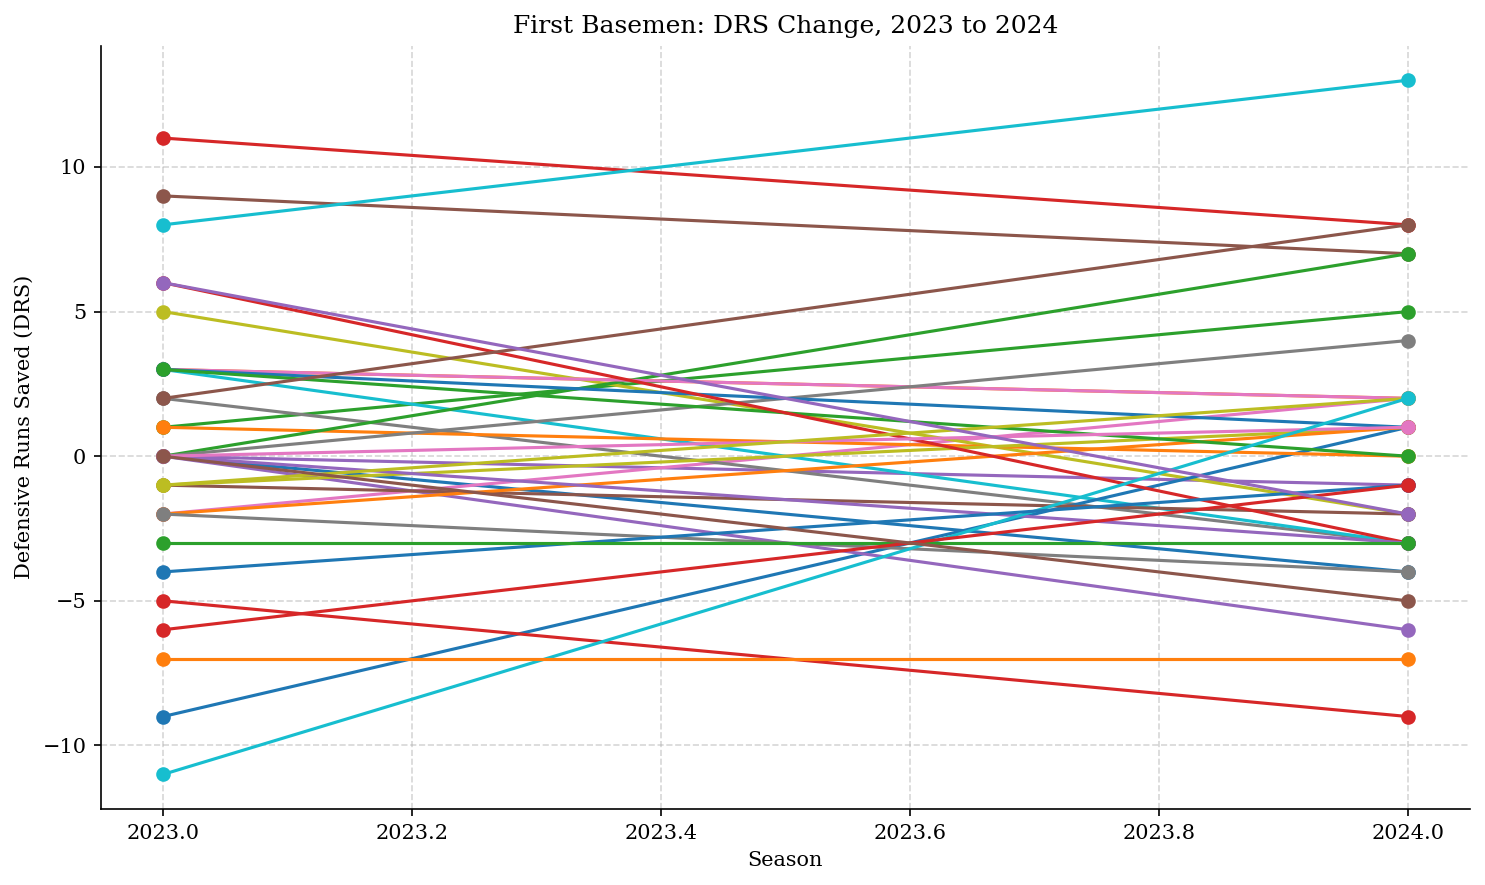

In [30]:
plt.figure(figsize=(10, 6))

for _, row in trend_df.iterrows():
    plt.plot([2023, 2024], [row[2023], row[2024]], marker='o', label=row.name)

plt.title("First Basemen: DRS Change, 2023 to 2024")
plt.xlabel("Season")
plt.ylabel("Defensive Runs Saved (DRS)")
plt.grid(True, linestyle='--', alpha=0.5)

for spine in ["right", "top"]:
    plt.gca().spines[spine].set_visible(False)
    
plt.tight_layout()
plt.show()

#### ... Not exactly the greatest visual - a bit cluttered ...

#### Another try without looking at change over time

In [31]:
metrics = ['OAA', 'DRS', 'success_rate']
leaderboard_data = defense_combined.dropna(subset=metrics).copy()

scaler = MinMaxScaler()
leaderboard_data[[f'{m}_scaled' for m in metrics]] = scaler.fit_transform(leaderboard_data[metrics])

leaderboard_data['Combined_Score'] = leaderboard_data[[f'{m}_scaled' for m in metrics]].mean(axis=1)

leaderboard = leaderboard_data.sort_values('Combined_Score', ascending=False)[['Player', 'Season', 'OAA', 'DRS', 'success_rate', 'Combined_Score']]

print(leaderboard.head(10))

              Player  Season   OAA  DRS success_rate  Combined_Score
36  Christian Walker    2023  12.0    9    99.114583        0.824764
64    Carlos Santana    2024  14.0    8    99.023136        0.820204
76  Christian Walker    2024  13.0    7    99.114583        0.809332
28    Carlos Santana    2023   2.0   11    99.023136        0.713722
5     Garrett Cooper    2023   4.0    1        99.68        0.709877
49        Joey Gallo    2024   3.0    7    99.066874        0.677860
61        Matt Olson    2024   4.0   13    98.440208        0.668260
58  Ryan Mountcastle    2024   2.0    8    98.841962        0.641618
52      Bryce Harper    2024   8.0    5    98.515625        0.619202
12  Paul Goldschmidt    2023   3.0    3    99.022346        0.614824


C:\Users\sengle01\AppData\Local\Temp\ipykernel_9904\4015752026.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = leaderboard_data[metrics].corr()


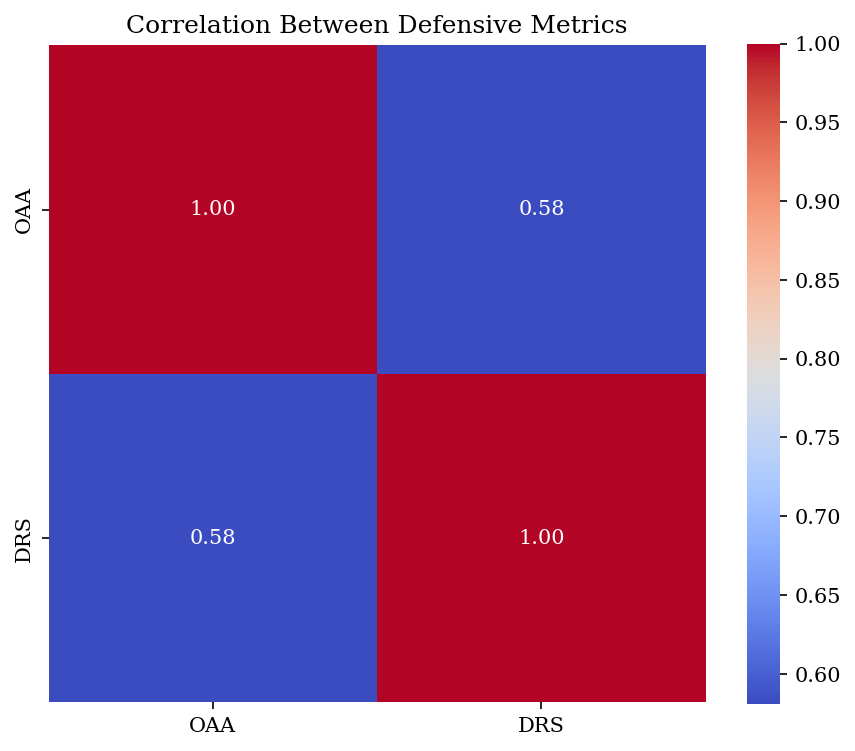

In [32]:
corr = leaderboard_data[metrics].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Between Defensive Metrics")
plt.tight_layout()
plt.show()

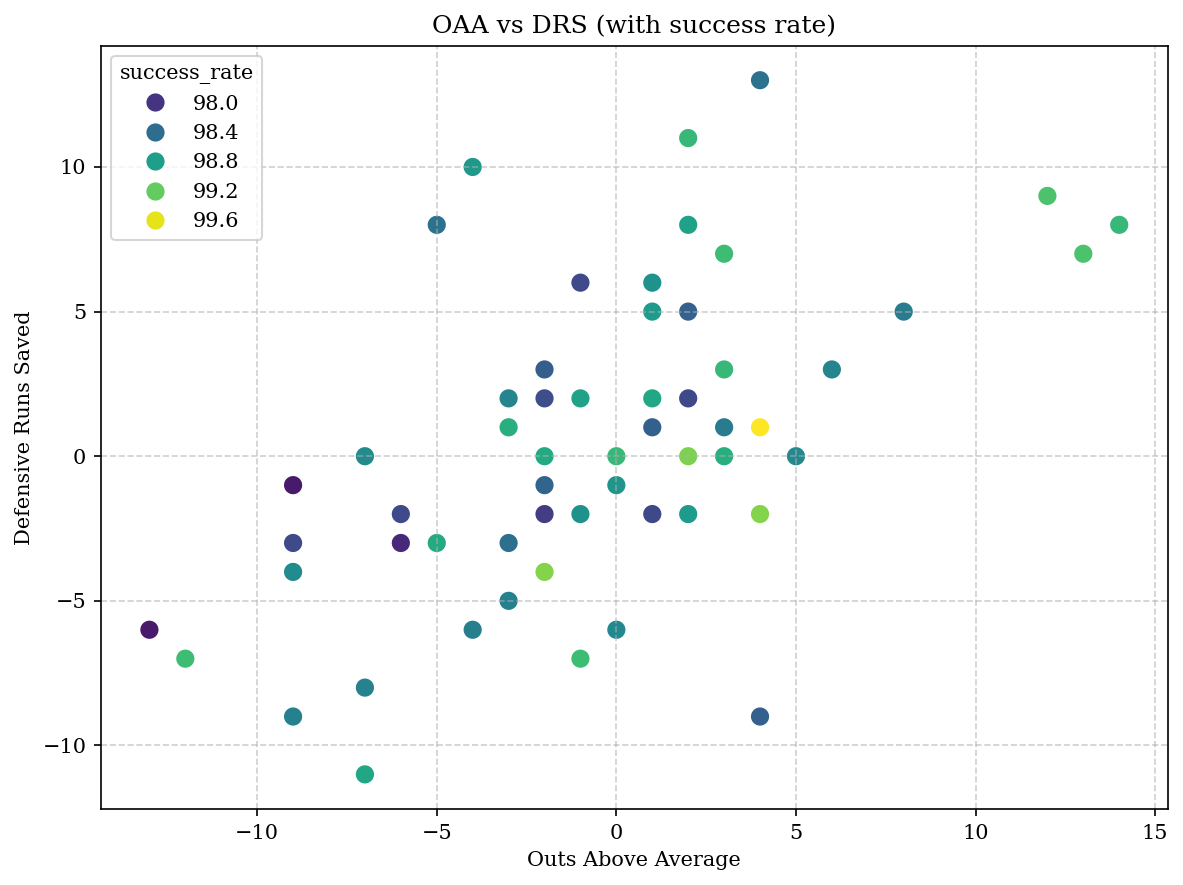

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=leaderboard_data, x='OAA', y='DRS', hue='success_rate', palette='viridis', s=90)

plt.title('OAA vs DRS (with success rate)')
plt.xlabel('Outs Above Average')
plt.ylabel('Defensive Runs Saved')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [34]:
trend_table = leaderboard_data.pivot(index='Player', columns='Season', values='Combined_Score').dropna()
trend_table['Score_Change'] = trend_table[2024] - trend_table[2023]

improved = trend_table.sort_values('Score_Change', ascending=False).head(10)
declined = trend_table.sort_values('Score_Change').head(10)

print("Top Improvers:\n", improved)
print("\nTop Decliners:\n", declined)

Top Improvers:
 Season                     2023      2024  Score_Change
Player                                                 
Spencer Torkelson      0.272299  0.551620      0.279321
Matt Olson             0.487705  0.668260      0.180556
Ryan Mountcastle       0.521248  0.641618      0.120370
Vladimir Guerrero Jr.  0.092861  0.211688      0.118827
Bryce Harper           0.501918  0.619202      0.117284
Carlos Santana         0.713722  0.820204      0.106481
Freddie Freeman        0.339063  0.440915      0.101852
Connor Joe             0.369936  0.437837      0.067901
Jake Cronenworth       0.499945  0.560131      0.060185
Christian Walker       0.824764  0.809332     -0.015432

Top Decliners:
 Season                2023      2024  Score_Change
Player                                            
Pete Alonso       0.459207  0.235441     -0.223765
Josh Naylor       0.531958  0.386896     -0.145062
Ty France         0.432474  0.296671     -0.135802
Wilmer Flores     0.577296  0.441493    

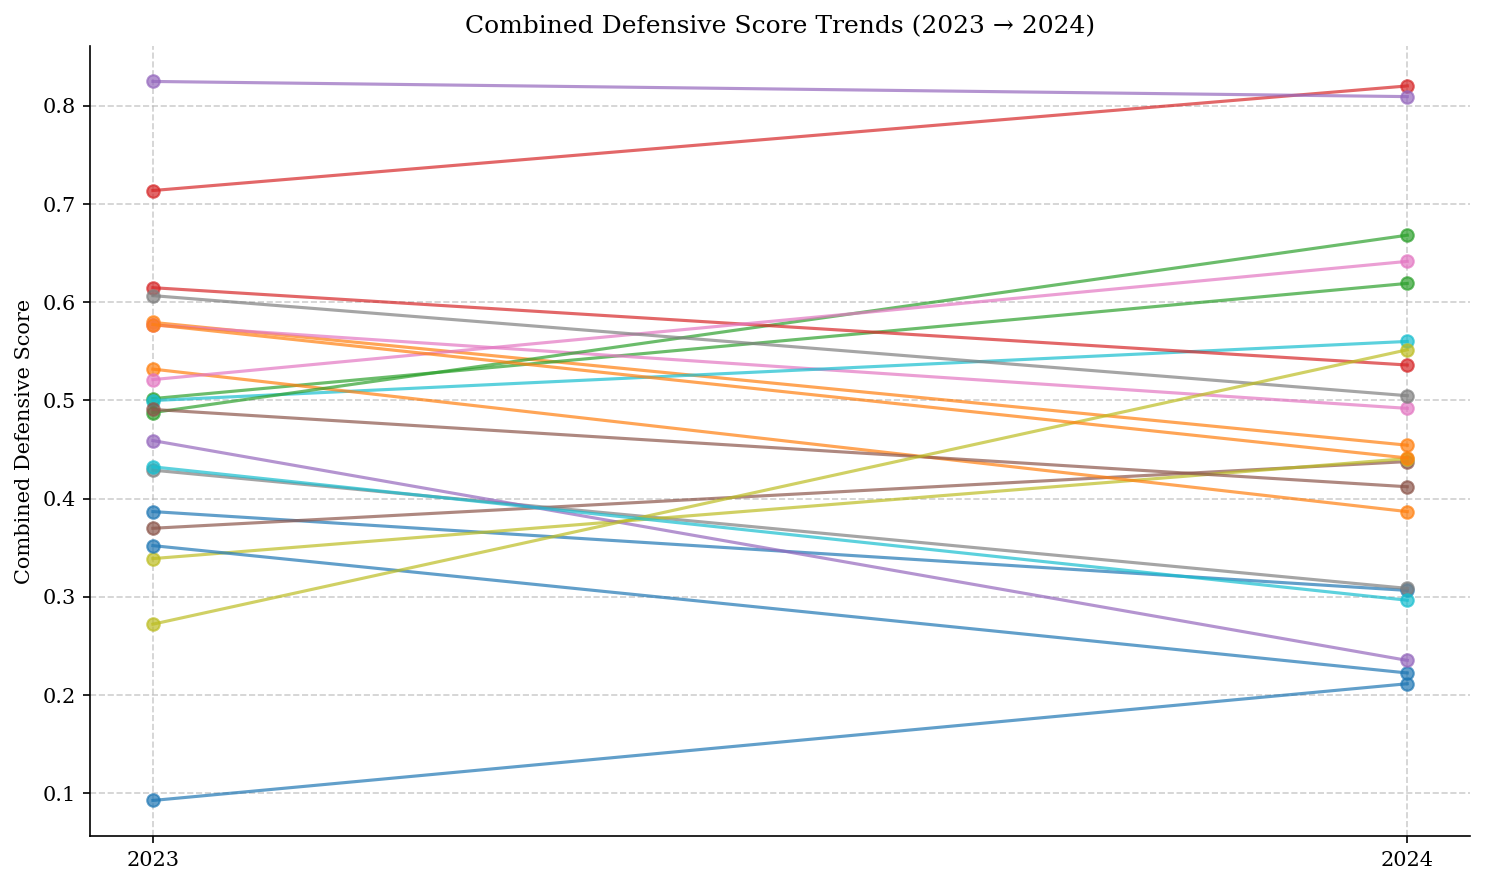

In [35]:
plt.figure(figsize=(10, 6))
for player in trend_table.index:
    plt.plot([2023, 2024], [trend_table.loc[player, 2023], trend_table.loc[player, 2024]],
             marker='o', label=player if abs(trend_table.loc[player, 'Score_Change']) > 0.2 else None,
             alpha=0.7)

plt.title('Combined Defensive Score Trends (2023 → 2024)')
plt.ylabel('Combined Defensive Score')
plt.xticks([2023, 2024])
plt.grid(True, linestyle='--', alpha=0.6)

for spine in ["right", "top"]:
    plt.gca().spines[spine].set_visible(False)
    
plt.tight_layout()
plt.show()

##### ... I'll figure out a better way of visualizing these and update. A quick method or fewer players, but there has to be a better overall visual ...

##### But this tangent is the beginning of something bigger: how would we predict performance? 
##### OAA, DRS, UZR, are some of the highest regarded metrics for evaluating fielding performance. It's very easy to *track* their performance, but what can we do about predicting it? (more to come regarding that)

In [36]:
uzr_2023 = pd.read_csv('drs_2023.csv')
uzr_2024 = pd.read_csv('drs_2024.csv')

uzr_2023['Season'] = 2023
uzr_2024['Season'] = 2024

uzr_all = pd.concat([uzr_2023, uzr_2024], ignore_index=True)

uzr_all = uzr_all[['Name', 'Season', 'Inn', 'UZR', 'UZR/150', 'RngR', 'ErrR', 'DPR']].copy()
uzr_all.columns = ['Player', 'Season', 'Innings', 'UZR', 'UZR_150', 'RngR', 'ErrR', 'DPR']

print(uzr_all.sort_values(by='UZR', ascending=False).head(10))

                 Player  Season  Innings  UZR  UZR_150  RngR  ErrR  DPR
165       Dominic Smith    2023   1244.2  5.1      2.4  -1.3   6.0  0.4
179    Christian Walker    2024   1104.1  4.3      2.9   0.3   4.1  0.0
75     Christian Walker    2023   1309.1  3.5      2.6  -0.6   4.4 -0.4
175       Andrew Vaughn    2023   1229.1  3.5      2.3   0.7   3.1 -0.2
325  Vinnie Pasquantino    2024    893.0  3.4      5.1   1.7   1.8  0.0
182      Salvador Perez    2024    392.1  3.1      7.9   1.2   1.9  0.0
348       Andrew Vaughn    2024   1059.1  2.5      3.4   1.1   1.4  0.0
344        Rowdy Tellez    2024    905.1  2.3      2.8   0.7   1.9 -0.2
317      Nathaniel Lowe    2024   1193.2  2.2      2.8   0.6   1.5  0.1
329       Anthony Rizzo    2024    801.2  2.1      2.5   0.1   1.9  0.2


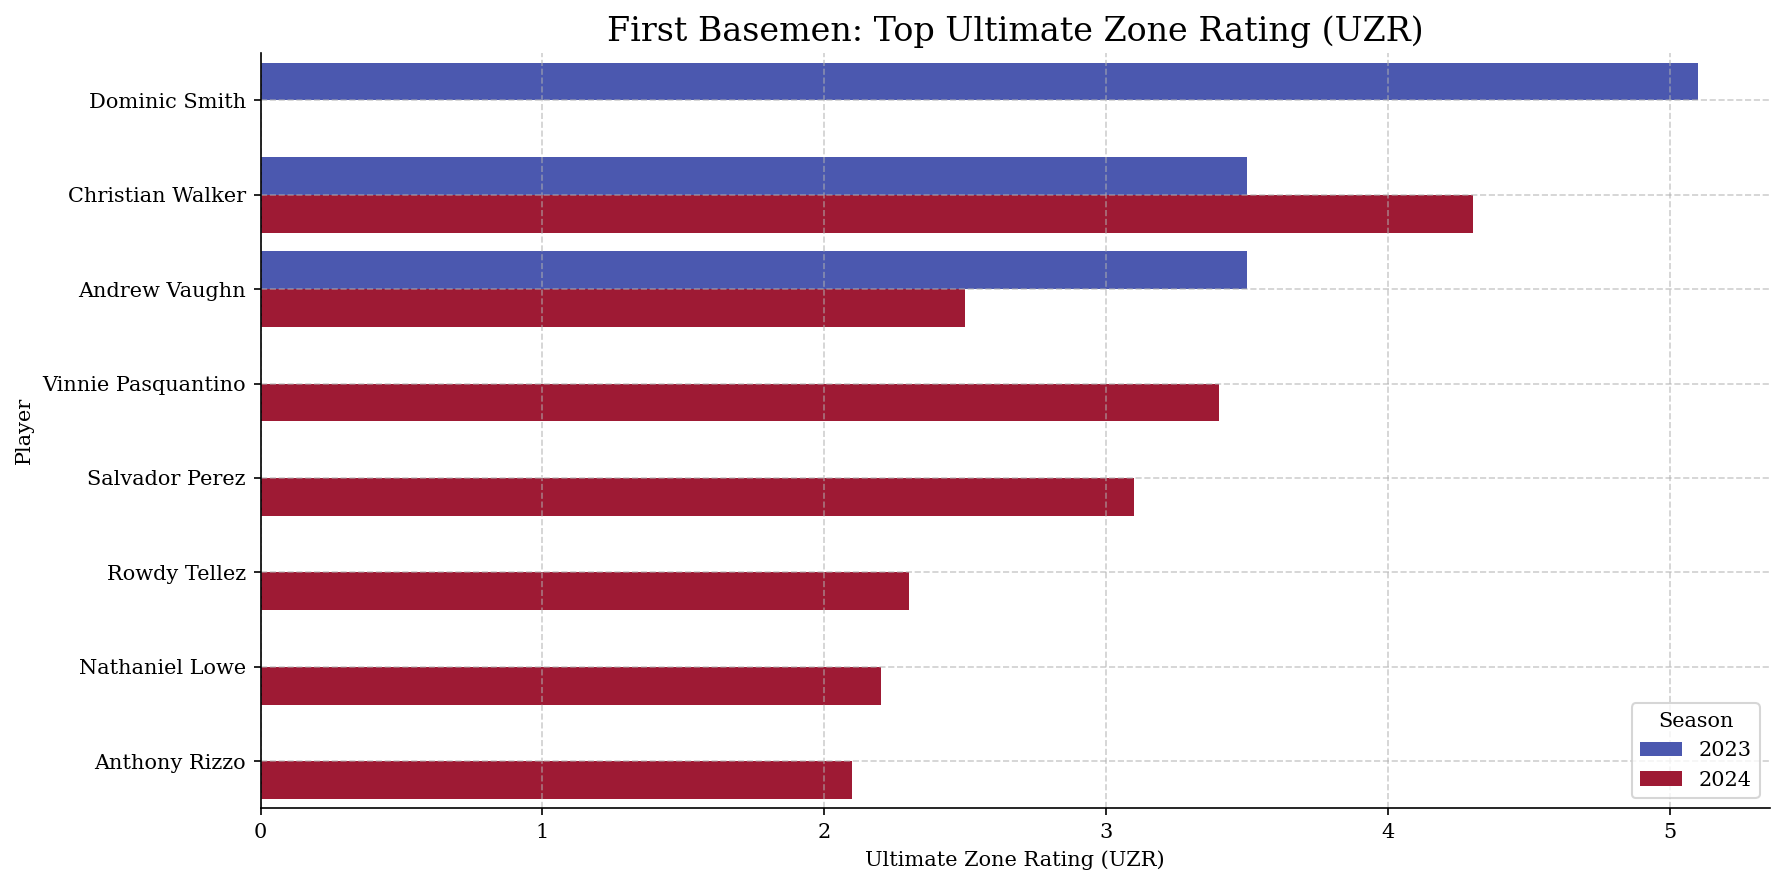

In [37]:
top_uzr = uzr_all.sort_values(by='UZR', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_uzr, x='UZR', y='Player', hue='Season', palette='coolwarm')

plt.title('First Basemen: Top Ultimate Zone Rating (UZR)', fontsize=16)
plt.xlabel('Ultimate Zone Rating (UZR)')
plt.ylabel('Player')
plt.grid(True, linestyle='--', alpha=0.6)

for spine in ["right", "top"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

In [38]:
defense_combined = defense_combined.merge(
    uzr_all[['Player', 'Season', 'UZR', 'UZR_150', 'RngR', 'ErrR', 'DPR']],
    on=['Player', 'Season'],
    how='left'
)

print(defense_combined[['Player', 'Season', 'OAA', 'DRS', 'UZR', 'success_rate']].head())

          Player  Season   OAA  DRS  UZR success_rate
0     José Abreu    2023  -6.0   -1 -0.2          NaN
1    Pete Alonso    2023  -1.0    6 -1.5    98.141972
2      Josh Bell    2023  -3.0   -5 -1.3    98.561841
3      Alec Bohm    2023  -6.0   -2 -2.1    98.141264
4  Triston Casas    2023 -10.0   -4  1.4          NaN


C:\Users\sengle01\AppData\Local\Temp\ipykernel_9904\3397783997.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = defense_combined[metrics].dropna().corr()


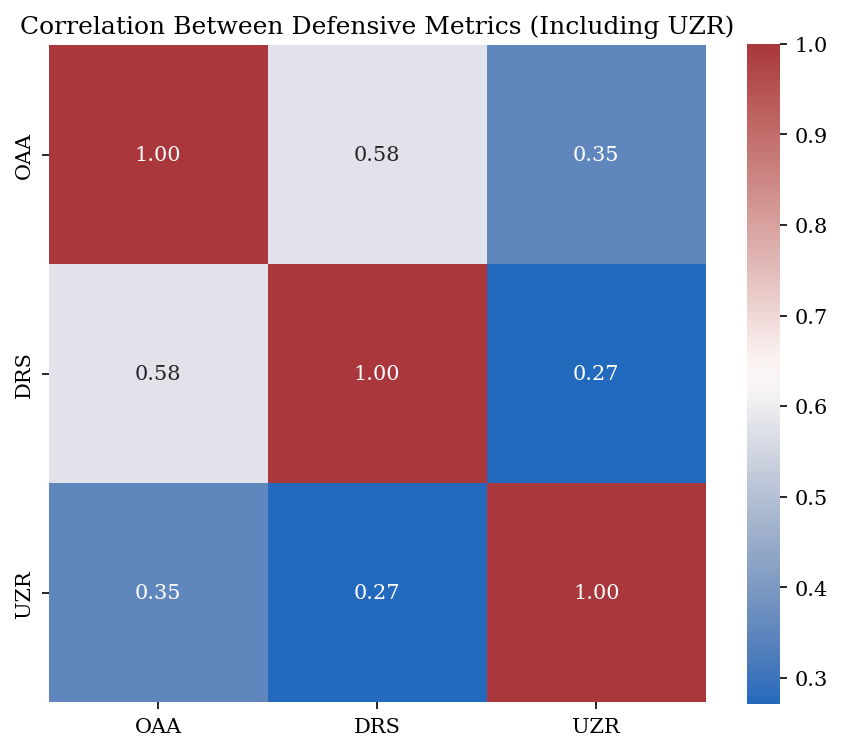

In [39]:
metrics = ['OAA', 'DRS', 'UZR', 'success_rate']
corr = defense_combined[metrics].dropna().corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='vlag', fmt='.2f', square=True)
plt.title('Correlation Between Defensive Metrics (Including UZR)')
plt.tight_layout()
plt.show()

In [40]:
metrics = ['OAA', 'DRS', 'UZR', 'success_rate']
score_data = defense_combined.dropna(subset=metrics).copy()

scaler = MinMaxScaler()
score_data[[f'{m}_scaled' for m in metrics]] = scaler.fit_transform(score_data[metrics])

score_data['Combined_Score'] = score_data[[f'{m}_scaled' for m in metrics]].mean(axis=1)

leaderboard = score_data.sort_values('Combined_Score', ascending=False)[['Player', 'Season', 'OAA', 'DRS', 'UZR', 'success_rate', 'Combined_Score']]

print(leaderboard.head(10))

              Player  Season   OAA  DRS  UZR success_rate  Combined_Score
76  Christian Walker    2024  13.0    7  4.3    99.114583        0.836591
36  Christian Walker    2023  12.0    9  3.5    99.114583        0.827757
64    Carlos Santana    2024  14.0    8  1.9    99.023136        0.783520
29     Dominic Smith    2023   1.0    5  5.1    98.778004        0.682646
49        Joey Gallo    2024   3.0    7  1.2    99.066874        0.658905
5     Garrett Cooper    2023   4.0    1  0.0        99.68        0.652305
58  Ryan Mountcastle    2024   2.0    8  1.8    98.841962        0.647030
28    Carlos Santana    2023   2.0   11 -1.0    99.023136        0.629679
61        Matt Olson    2024   4.0   13  0.1    98.440208        0.623644
52      Bryce Harper    2024   8.0    5  1.4    98.515625        0.620014


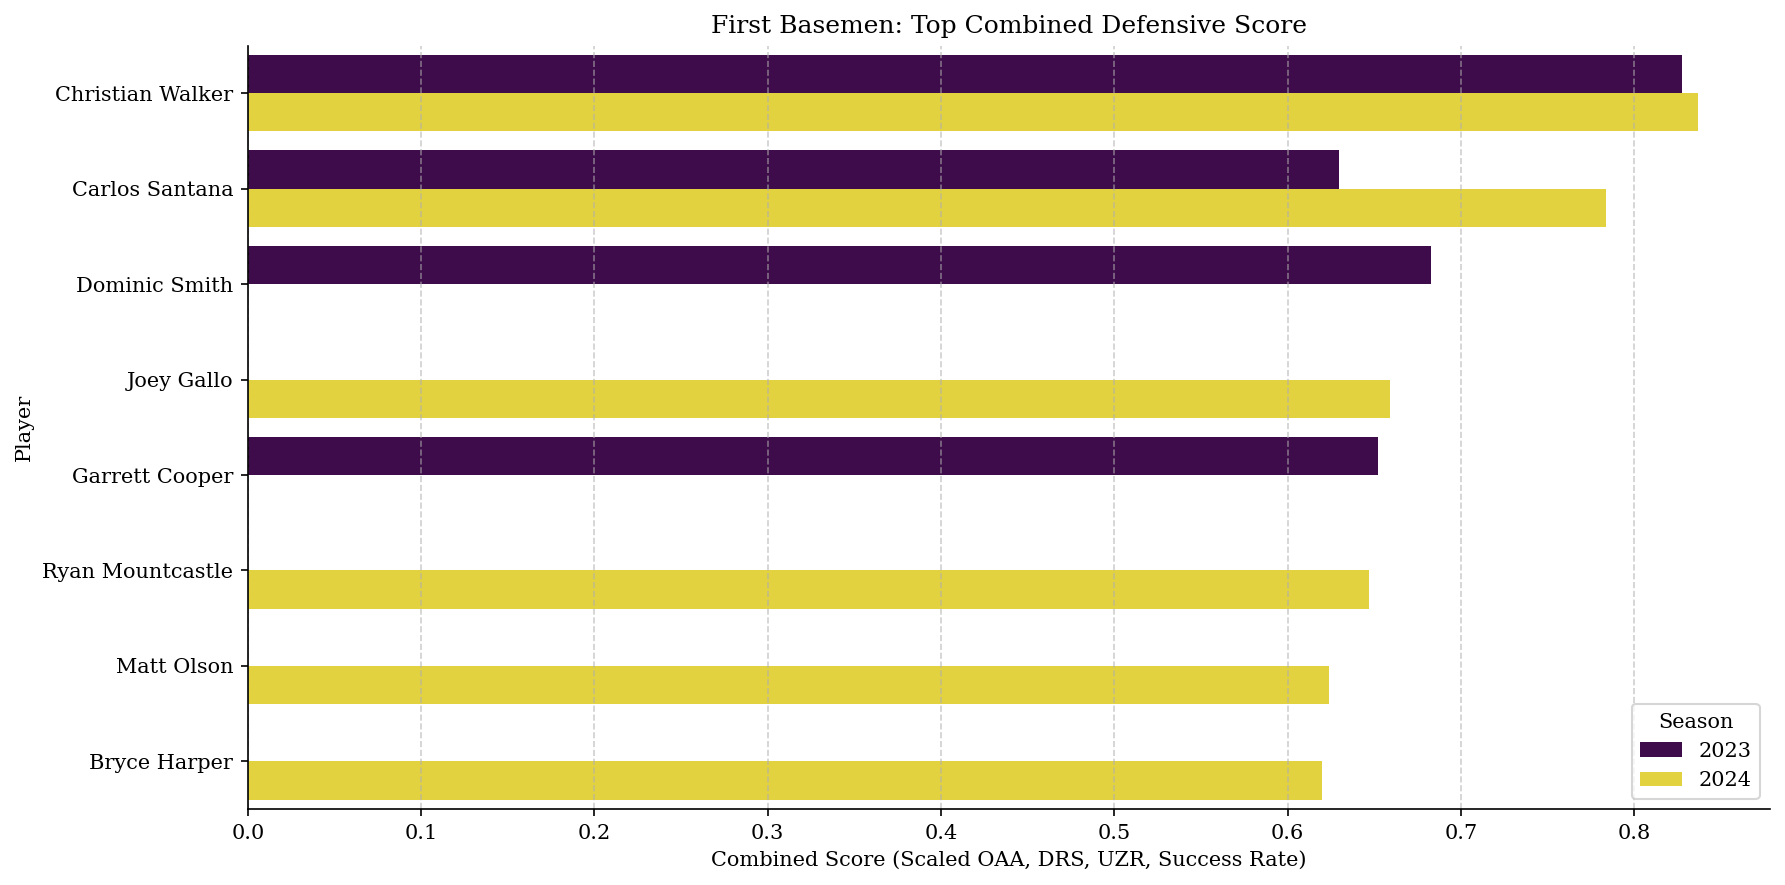

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(data=leaderboard.head(10), x='Combined_Score', y='Player', hue='Season', palette='viridis')

plt.title('First Basemen: Top Combined Defensive Score')
plt.xlabel('Combined Score (Scaled OAA, DRS, UZR, Success Rate)')
plt.ylabel('Player')
plt.grid(axis='x', linestyle='--', alpha=0.6)

for spine in ["right", "top"]:
    plt.gca().spines[spine].set_visible(False)
    
plt.tight_layout()
plt.show()

#### Attempting to Analyze 'Scooping'

In [42]:
scooping_proxies = score_data[['Player', 'Season', 'DPR', 'ErrR']].copy()
print(scooping_proxies.sort_values('DPR', ascending=False).head(10))

               Player  Season  DPR  ErrR
59        Josh Naylor    2024  0.6  -0.2
6           C.J. Cron    2023  0.4   0.1
29      Dominic Smith    2023  0.4   6.0
50   Paul Goldschmidt    2024  0.4  -1.6
53       Rhys Hoskins    2024  0.3  -0.9
73  Spencer Torkelson    2024  0.3   0.0
20   Elehuris Montero    2023  0.2   0.2
40          Josh Bell    2024  0.2  -0.7
7    Jake Cronenworth    2023  0.2   1.9
33  Spencer Torkelson    2023  0.2  -4.3


In [43]:
scooping_data = score_data.dropna(subset=['DPR', 'ErrR']).copy()

scaler = MinMaxScaler()
scooping_data['DPR_scaled'] = scaler.fit_transform(scooping_data[['DPR']])
scooping_data['ErrR_scaled'] = 1 - scaler.fit_transform(scooping_data[['ErrR']])  # A lower ErrR is better

scooping_data['Scooping_Score'] = scooping_data[['DPR_scaled', 'ErrR_scaled']].mean(axis=1)

scooping_data['Combined_Score_With_Scooping'] = (scooping_data[['OAA_scaled', 'DRS_scaled', 'UZR_scaled', 'success_rate_scaled', 'Scooping_Score']].mean(axis=1))

leaderboard_with_scooping = scooping_data.sort_values('Combined_Score_With_Scooping', ascending=False)[
    ['Player', 'Season', 'Combined_Score_With_Scooping', 'OAA', 'DRS', 'UZR', 'DPR', 'ErrR']
]

print(leaderboard_with_scooping.head(10))

              Player  Season  Combined_Score_With_Scooping   OAA  DRS  UZR  \
76  Christian Walker    2024                      0.733174  13.0    7  4.3   
64    Carlos Santana    2024                      0.716931  14.0    8  1.9   
36  Christian Walker    2023                      0.686830  12.0    9  3.5   
61        Matt Olson    2024                      0.633426   4.0   13  0.1   
29     Dominic Smith    2023                      0.627935   1.0    5  5.1   
6          C.J. Cron    2023                      0.624583   2.0    0  1.3   
5     Garrett Cooper    2023                      0.623256   4.0    1  0.0   
28    Carlos Santana    2023                      0.611599   2.0   11 -1.0   
49        Joey Gallo    2024                      0.588995   3.0    7  1.2   
58  Ryan Mountcastle    2024                      0.586997   2.0    8  1.8   

    DPR  ErrR  
76  0.0   4.1  
64  0.0   1.4  
36 -0.4   4.4  
61  0.2  -1.3  
29  0.4   6.0  
6   0.4   0.1  
5  -0.1  -0.7  
28 -0.2  -2.3

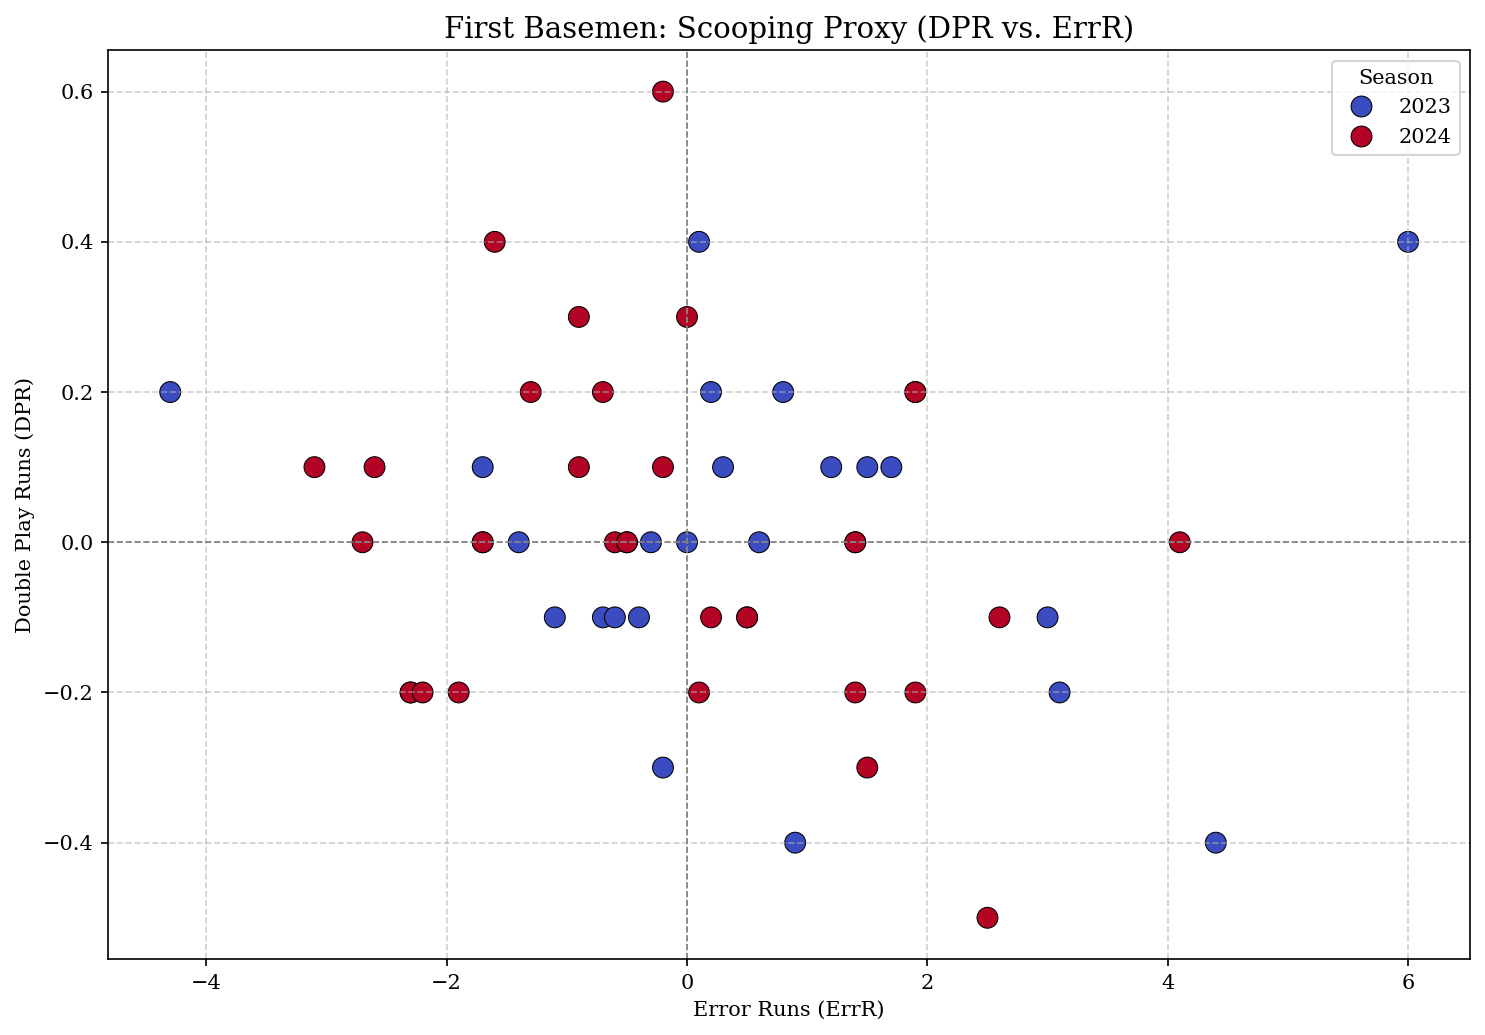

In [44]:
plt.figure(figsize=(10, 7))

sns.scatterplot(data=score_data,x='ErrR',y='DPR',hue='Season',palette='coolwarm',s=100,edgecolor='black',linewidth=0.5)

plt.axvline(0, linestyle='--', color='gray', linewidth=0.8)
plt.axhline(0, linestyle='--', color='gray', linewidth=0.8)
plt.title('First Basemen: Scooping Proxy (DPR vs. ErrR)', fontsize=14)
plt.xlabel('Error Runs (ErrR)')
plt.ylabel('Double Play Runs (DPR)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

What's going on here:

- Top-left quadrant: High DPR, low ErrR → Best scoopers

- Bottom-right quadrant: Low DPR, high ErrR → Well, you know...

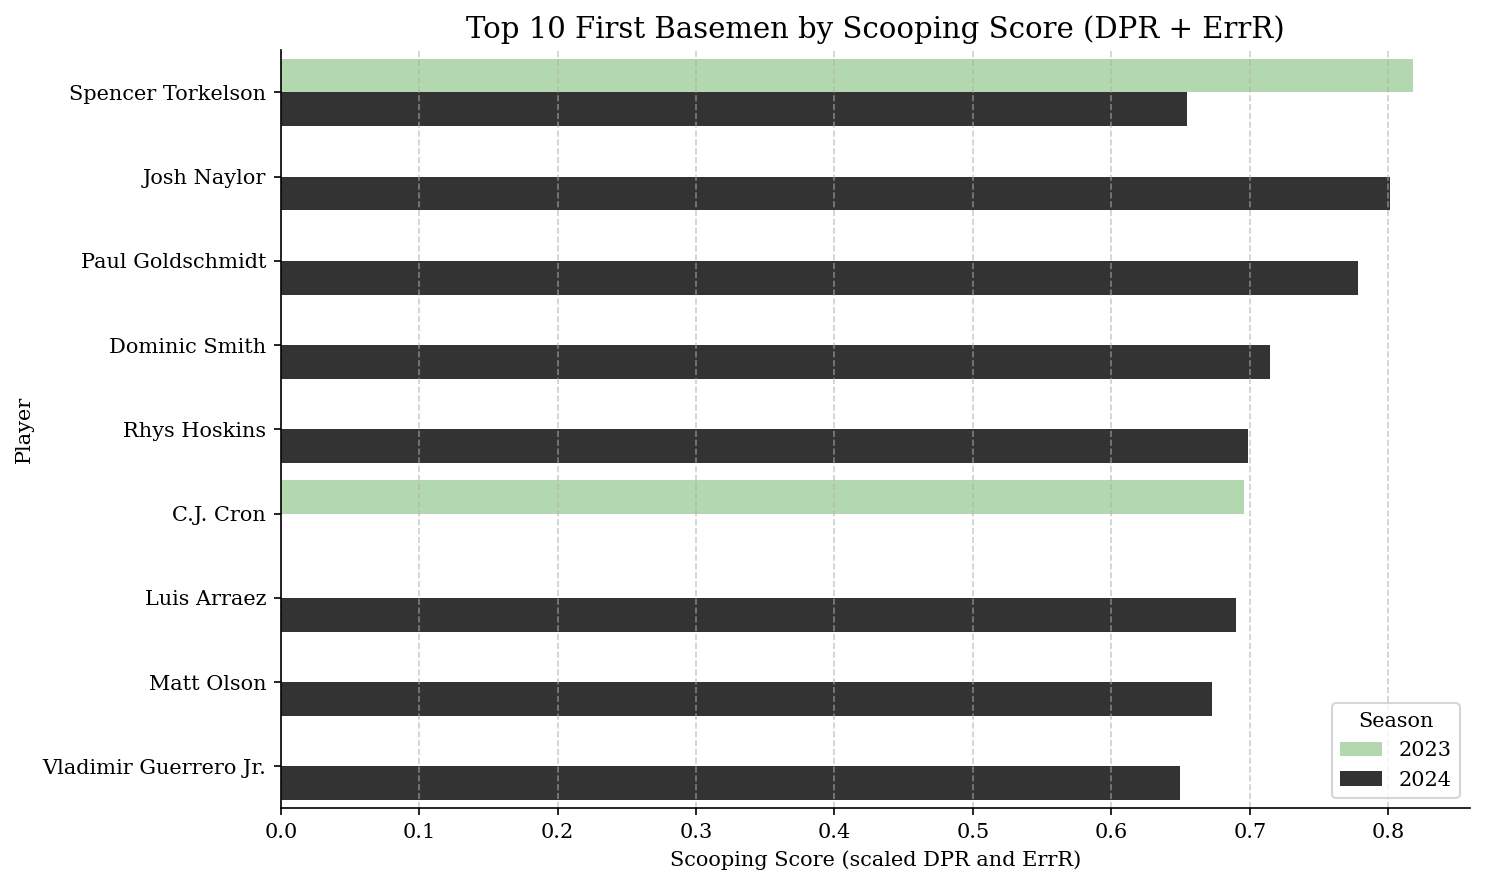

In [45]:
top_scoopers = scooping_data.sort_values('Scooping_Score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_scoopers, x='Scooping_Score', y='Player', hue='Season', palette='Greens_d')

plt.title('Top 10 First Basemen by Scooping Score (DPR + ErrR)', fontsize=14)
plt.xlabel('Scooping Score (scaled DPR and ErrR)')
plt.ylabel('Player')
plt.grid(axis='x', linestyle='--', alpha=0.6)

for spine in ["right", "top"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

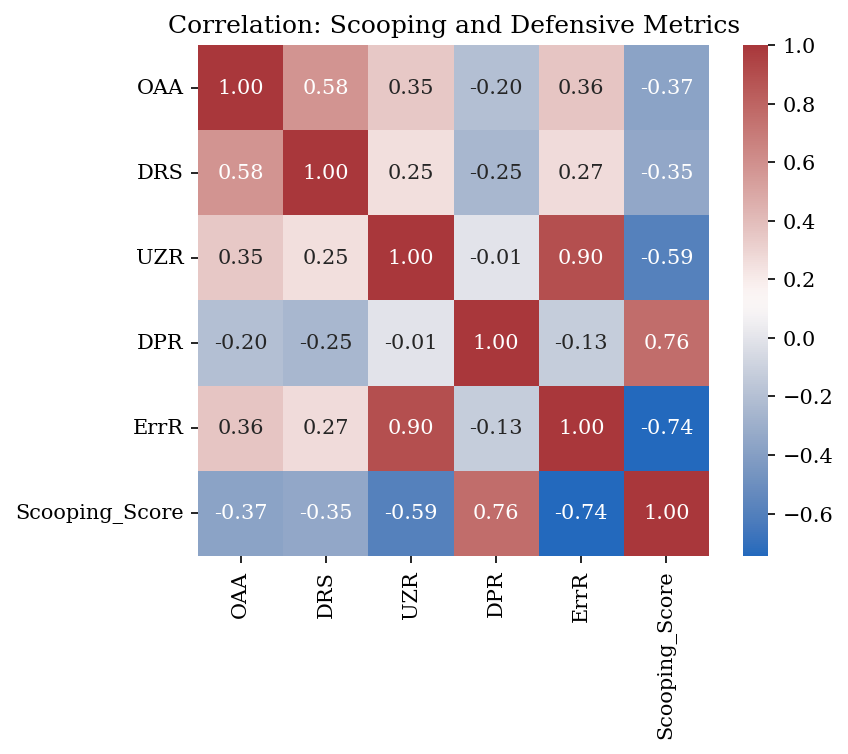

In [46]:
plt.figure(figsize=(6, 5))
scooping_corr = scooping_data[['OAA', 'DRS', 'UZR', 'DPR', 'ErrR', 'Scooping_Score']].corr()

sns.heatmap(scooping_corr, annot=True, cmap='vlag', fmt='.2f', square=True)
plt.title('Correlation: Scooping and Defensive Metrics')
plt.tight_layout()
plt.show()

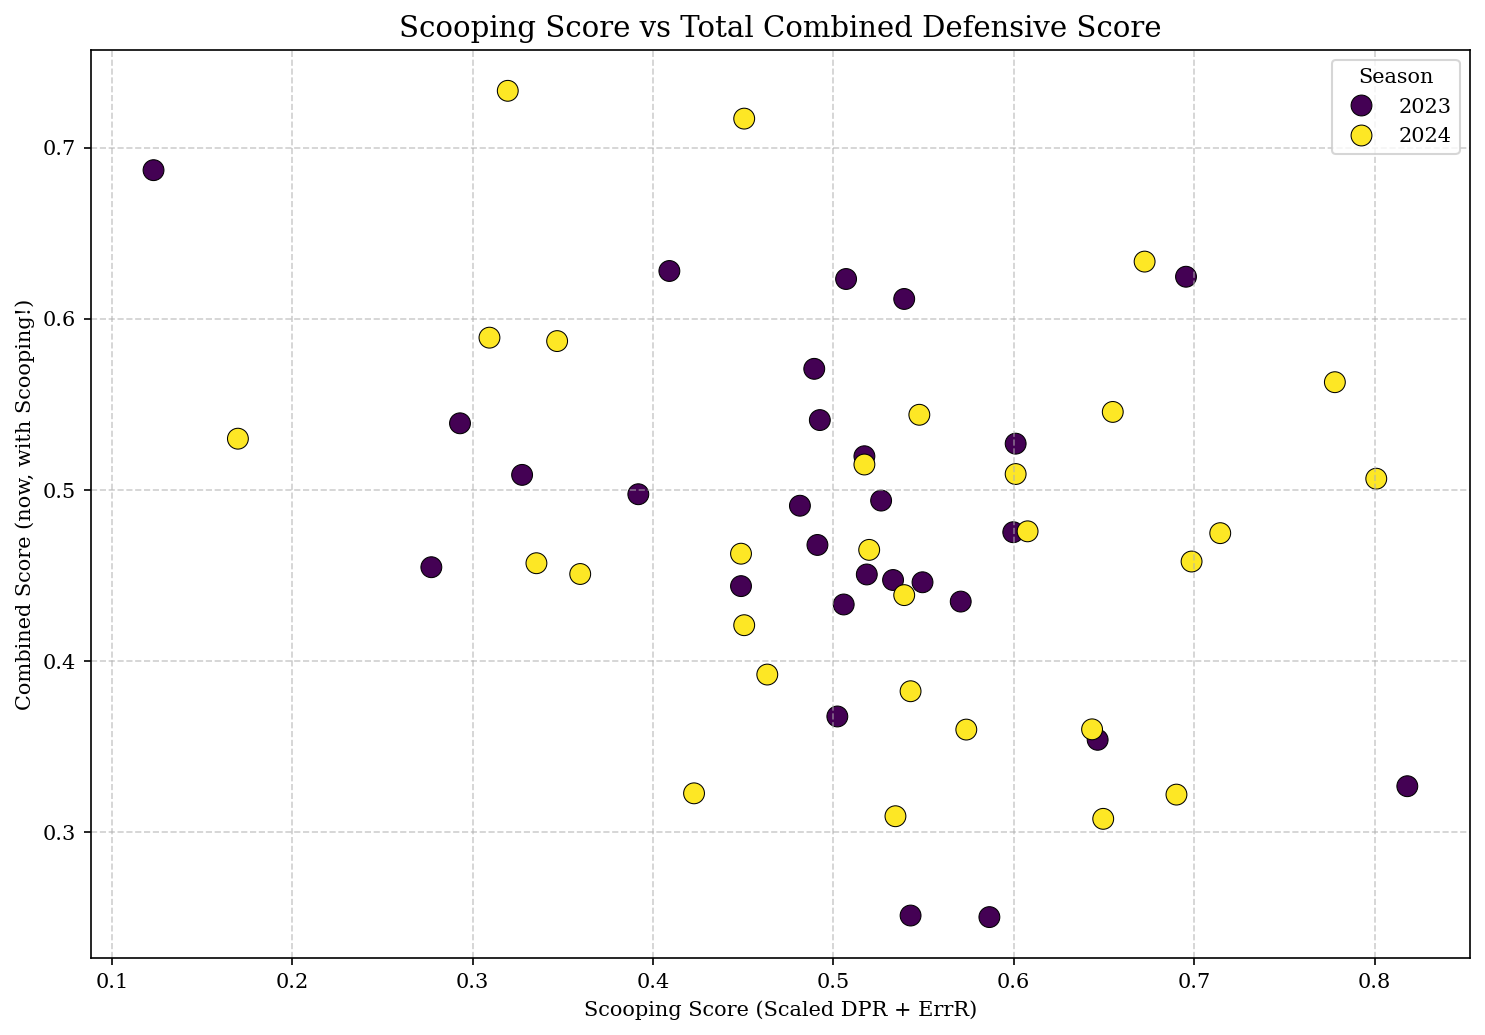

In [47]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=scooping_data,x='Scooping_Score',y='Combined_Score_With_Scooping',hue='Season',palette='viridis',s=100,edgecolor='black',linewidth=0.5)

plt.title('Scooping Score vs Total Combined Defensive Score', fontsize=14)
plt.xlabel('Scooping Score (Scaled DPR + ErrR)')
plt.ylabel('Combined Score (now, with Scooping!)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

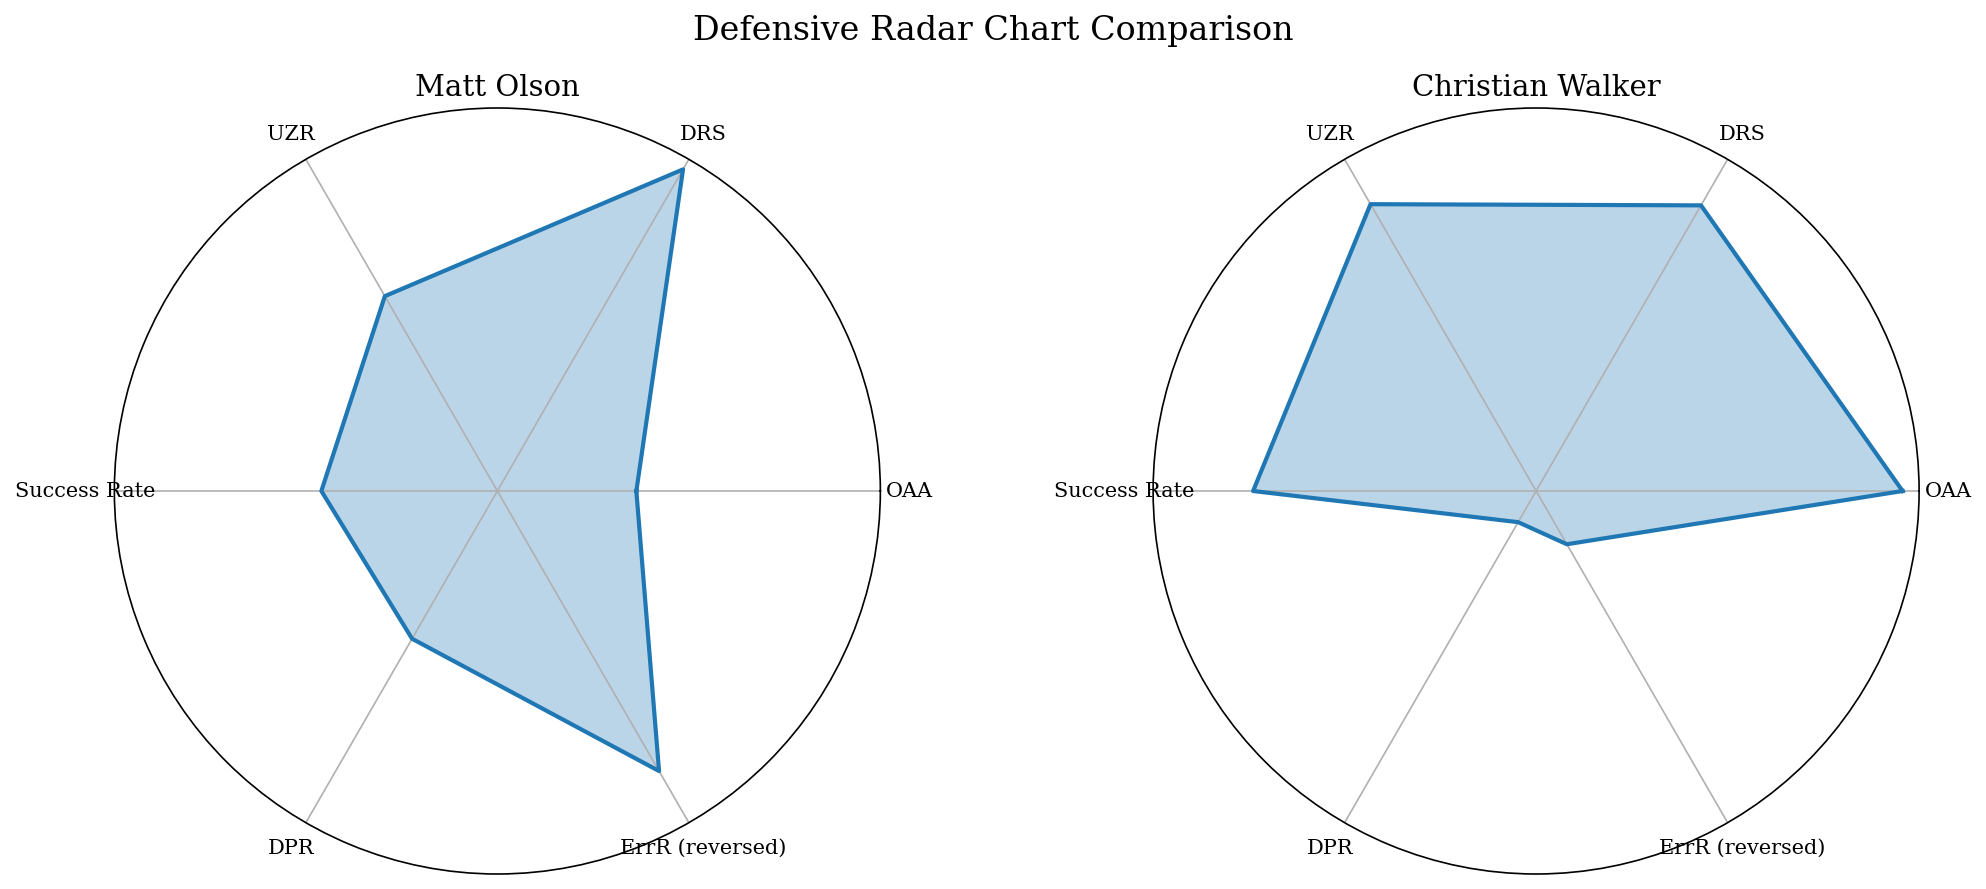

In [48]:
df      = scooping_data
player1 = 'Matt Olson'
player2 = 'Christian Walker'

metrics = ['OAA_scaled', 'DRS_scaled', 'UZR_scaled', 'success_rate_scaled', 'DPR_scaled', 'ErrR_scaled']
labels = ['OAA', 'DRS', 'UZR', 'Success Rate', 'DPR', 'ErrR (reversed)']
    
p1_data = df[df['Player'] == player1][metrics].values[0]
p2_data = df[df['Player'] == player2][metrics].values[0]

angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]
p1_data = np.append(p1_data, p1_data[0])
p2_data = np.append(p2_data, p2_data[0])

fig, axs = plt.subplots(1, 2, subplot_kw=dict(polar=True), figsize=(14, 6))

for i, (ax, player, data) in enumerate(zip(axs, [player1, player2], [p1_data, p2_data])):
    ax.plot(angles, data, label=player, linewidth=2)
    ax.fill(angles, data, alpha=0.3)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_yticks([])
    ax.set_title(player, fontsize=14)
    ax.grid(True)

fig.suptitle("Defensive Radar Chart Comparison", fontsize=16)
plt.tight_layout()
plt.show()

##### Need to move the ticklabels a bit...

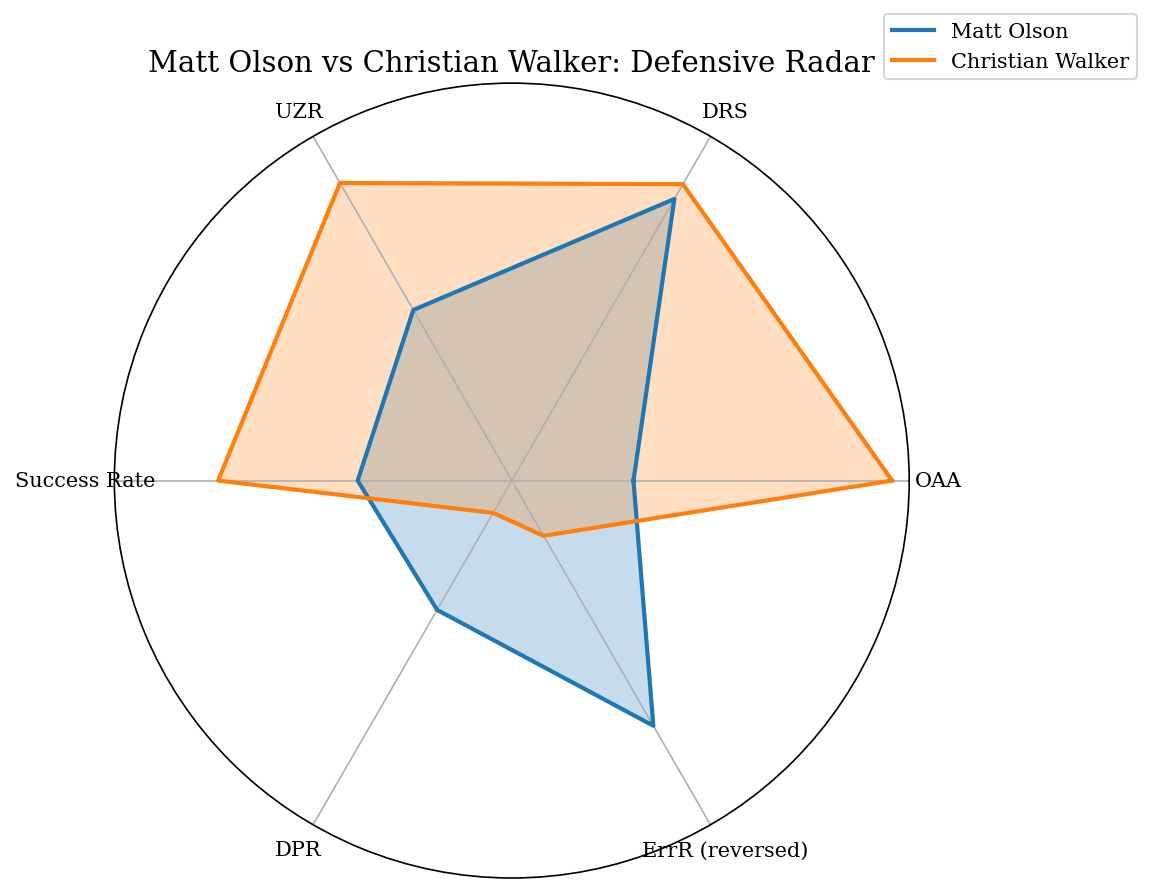

In [49]:
df      = scooping_data
player1 = 'Matt Olson'
player2 = 'Christian Walker'

metrics = ['OAA_scaled', 'DRS_scaled', 'UZR_scaled', 'success_rate_scaled', 'DPR_scaled', 'ErrR_scaled']
labels = ['OAA', 'DRS', 'UZR', 'Success Rate', 'DPR', 'ErrR (reversed)']

p1_data = df[df['Player'] == player1][metrics].values[0]
p2_data = df[df['Player'] == player2][metrics].values[0]

angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]
p1_data = np.append(p1_data, p1_data[0])
p2_data = np.append(p2_data, p2_data[0])

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.plot(angles, p1_data, label=player1, linewidth=2)
ax.fill(angles, p1_data, alpha=0.25)

ax.plot(angles, p2_data, label=player2, linewidth=2)
ax.fill(angles, p2_data, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([])
ax.set_title(f'{player1} vs {player2}: Defensive Radar', fontsize=14)
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

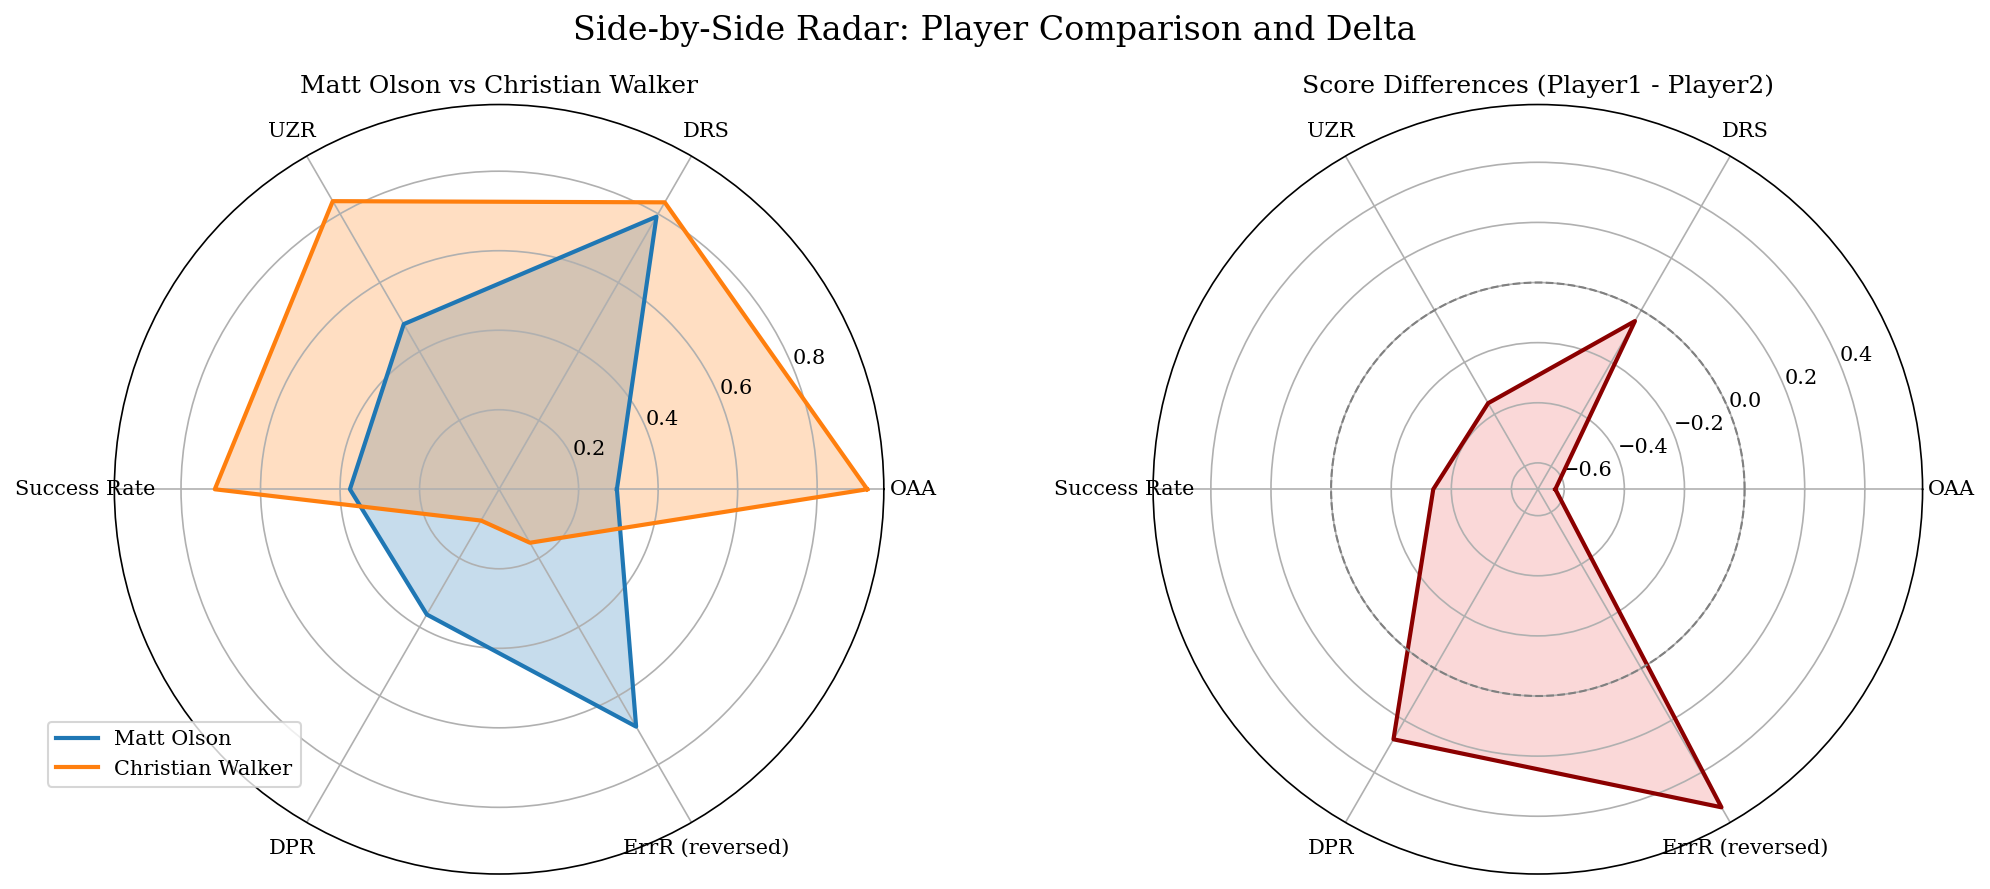

In [50]:
df      = scooping_data
player1 = 'Matt Olson'
player2 = 'Christian Walker'

metrics = ['OAA_scaled', 'DRS_scaled', 'UZR_scaled', 'success_rate_scaled', 'DPR_scaled', 'ErrR_scaled']
labels = ['OAA', 'DRS', 'UZR', 'Success Rate', 'DPR', 'ErrR (reversed)']

p1_data = df[df['Player'] == player1][metrics].values[0]
p2_data = df[df['Player'] == player2][metrics].values[0]
delta = p1_data - p2_data

angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]
p1_data = np.append(p1_data, p1_data[0])
p2_data = np.append(p2_data, p2_data[0])
delta = np.append(delta, delta[0])

fig, axs = plt.subplots(1, 2, subplot_kw=dict(polar=True), figsize=(14, 6))

axs[0].plot(angles, p1_data, label=player1, linewidth=2)
axs[0].fill(angles, p1_data, alpha=0.25)
axs[0].plot(angles, p2_data, label=player2, linewidth=2)
axs[0].fill(angles, p2_data, alpha=0.25)
axs[0].set_xticks(angles[:-1])
axs[0].set_xticklabels(labels)
axs[0].set_title(f'{player1} vs {player2}')
axs[0].legend(loc='lower left', bbox_to_anchor=(-0.1,0.1))

axs[1].plot(angles, delta, label=f'{player1} − {player2}', color='darkred', linewidth=2)
axs[1].fill(angles, delta, color='lightcoral', alpha=0.3)
axs[1].axhline(0, linestyle='--', color='gray', linewidth=1)
axs[1].set_xticks(angles[:-1])
axs[1].set_xticklabels(labels)
axs[1].set_title('Score Differences (Player1 - Player2)')

fig.suptitle("Side-by-Side Radar: Player Comparison and Delta", fontsize=16)
plt.tight_layout()
plt.show()

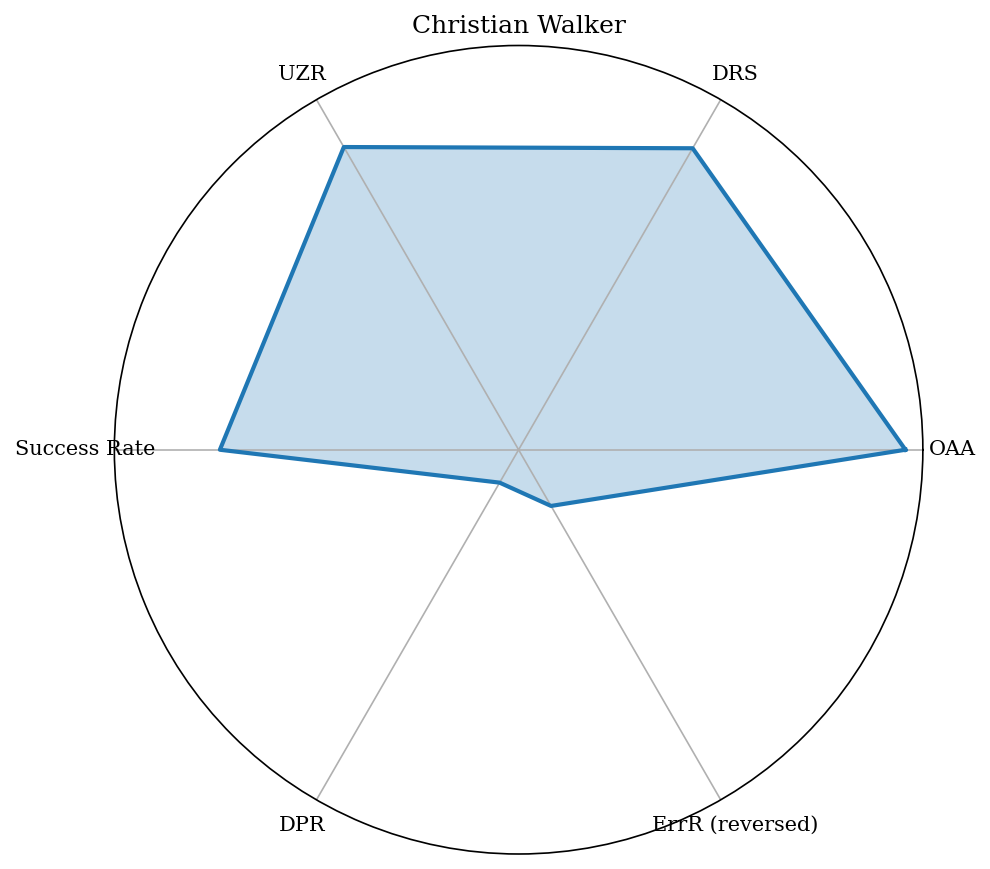

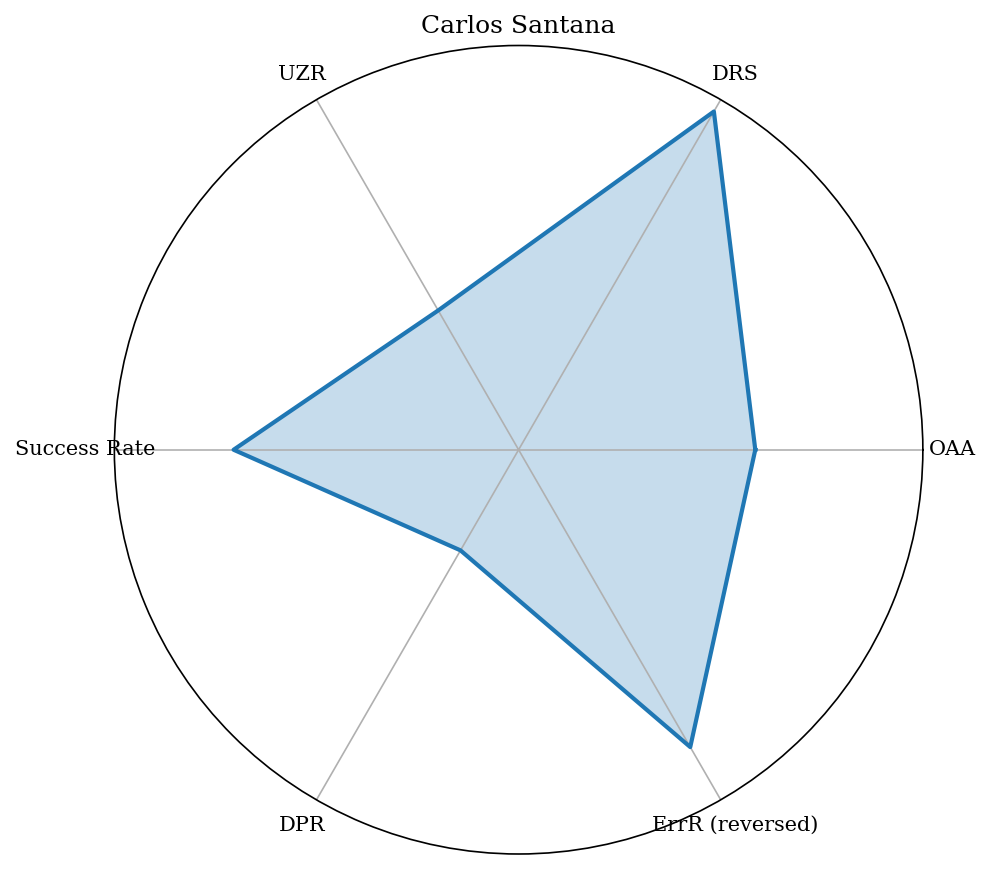

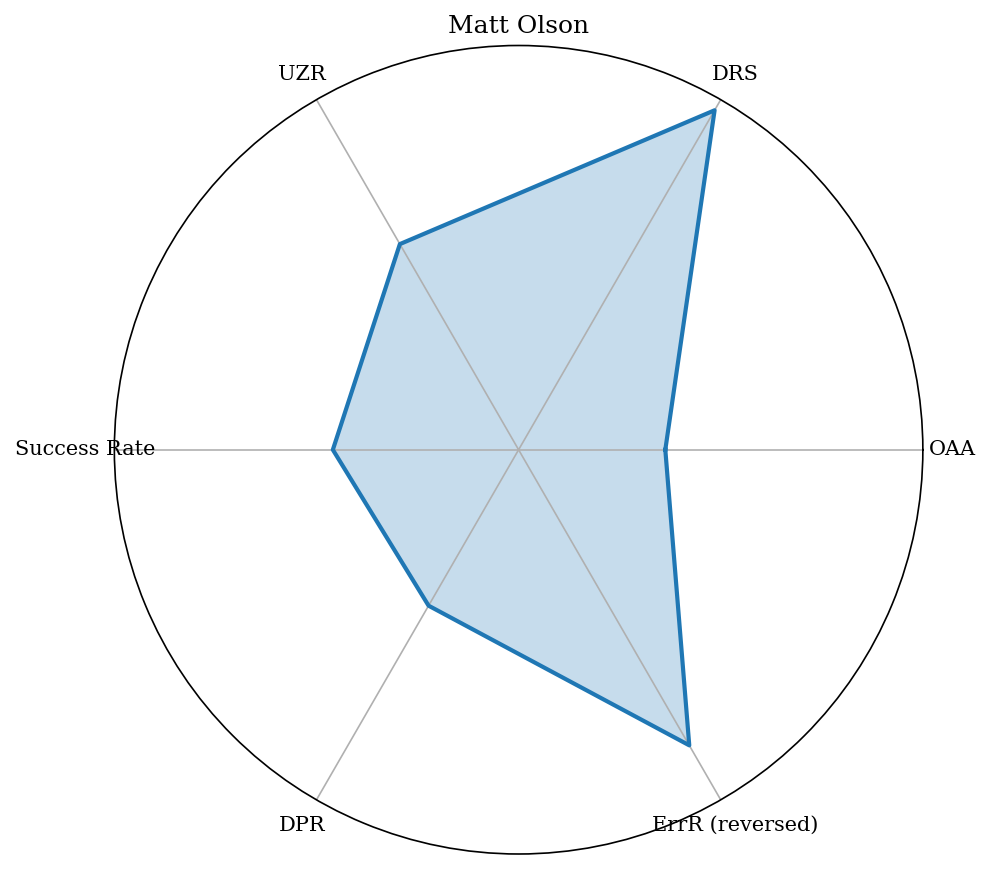

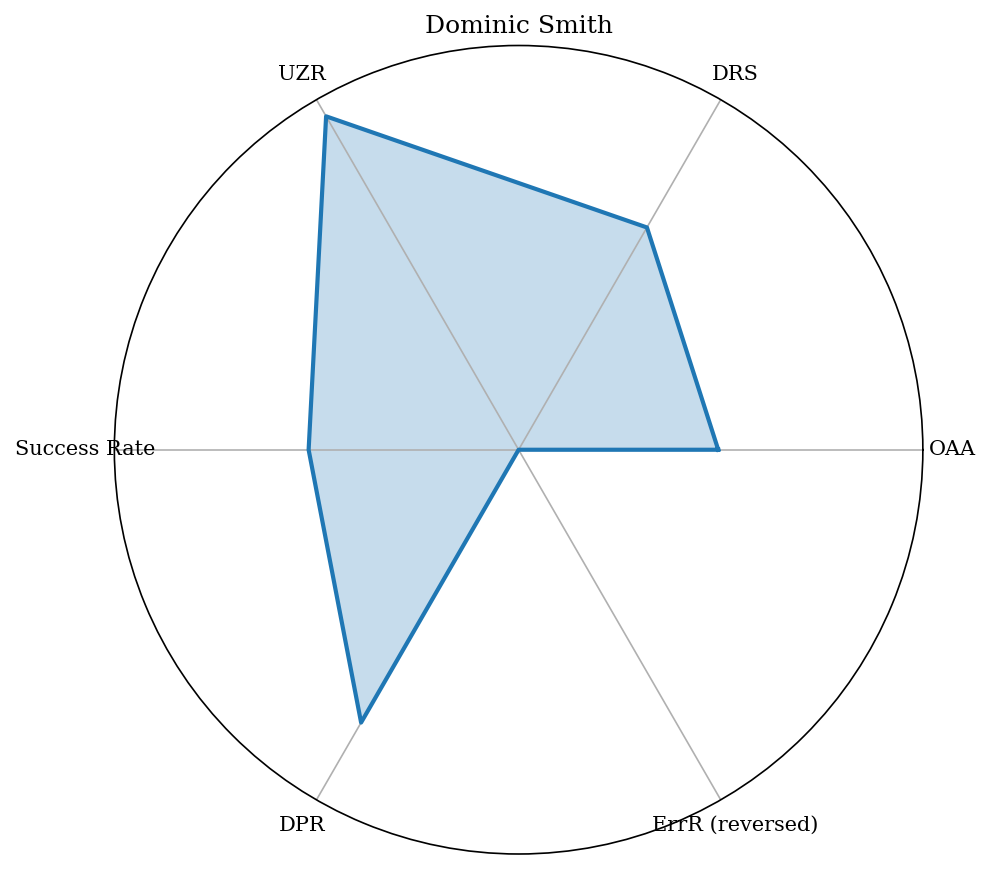

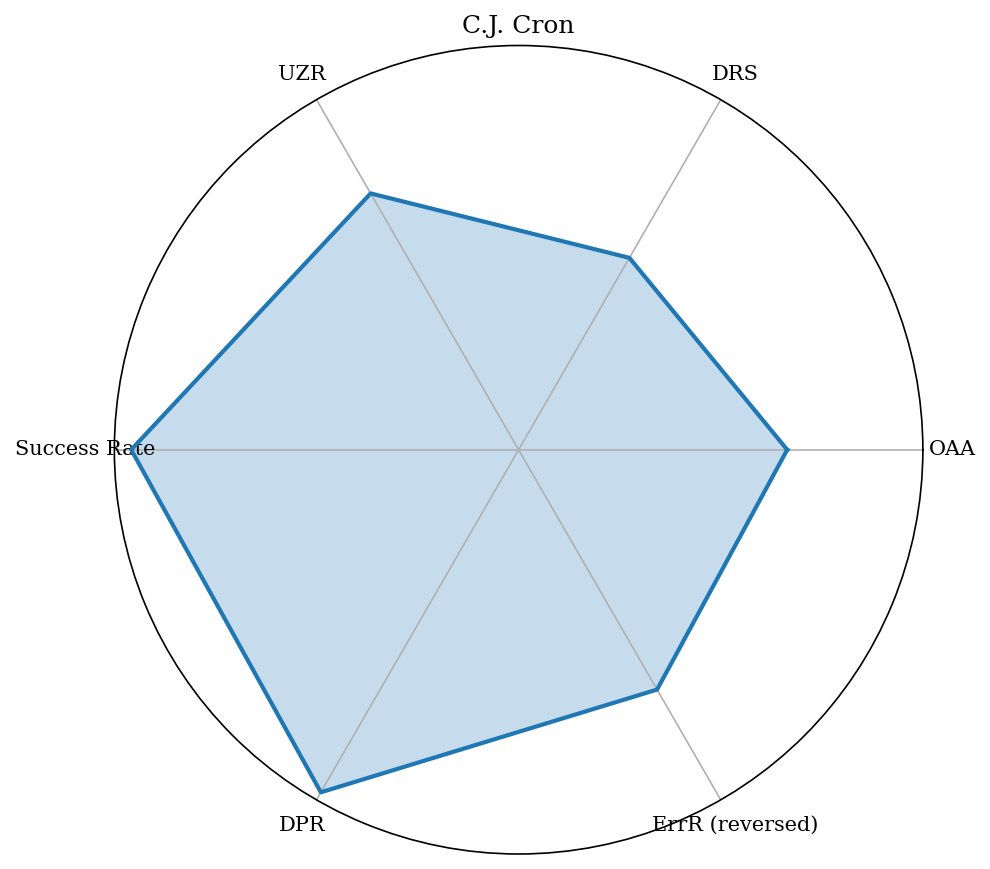

In [51]:
df   = scooping_data
N    = 5
save = False

metrics = ['OAA_scaled', 'DRS_scaled', 'UZR_scaled', 'success_rate_scaled', 'DPR_scaled', 'ErrR_scaled']
labels = ['OAA', 'DRS', 'UZR', 'Success Rate', 'DPR', 'ErrR (reversed)']
top_players = df.sort_values('Combined_Score_With_Scooping', ascending=False)['Player'].unique()[:N]

angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

for player in top_players:
    data = df[df['Player'] == player][metrics].values[0]
    data = np.append(data, data[0])

    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
    ax.plot(angles, data, label=player, linewidth=2)
    ax.fill(angles, data, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_yticks([])
    ax.set_title(player)
    ax.grid(True)

    if save:
        filename = f"radar_{player.replace(' ', '_')}.png"
        plt.savefig(filename, bbox_inches='tight', dpi=300)
    else:
        plt.show()

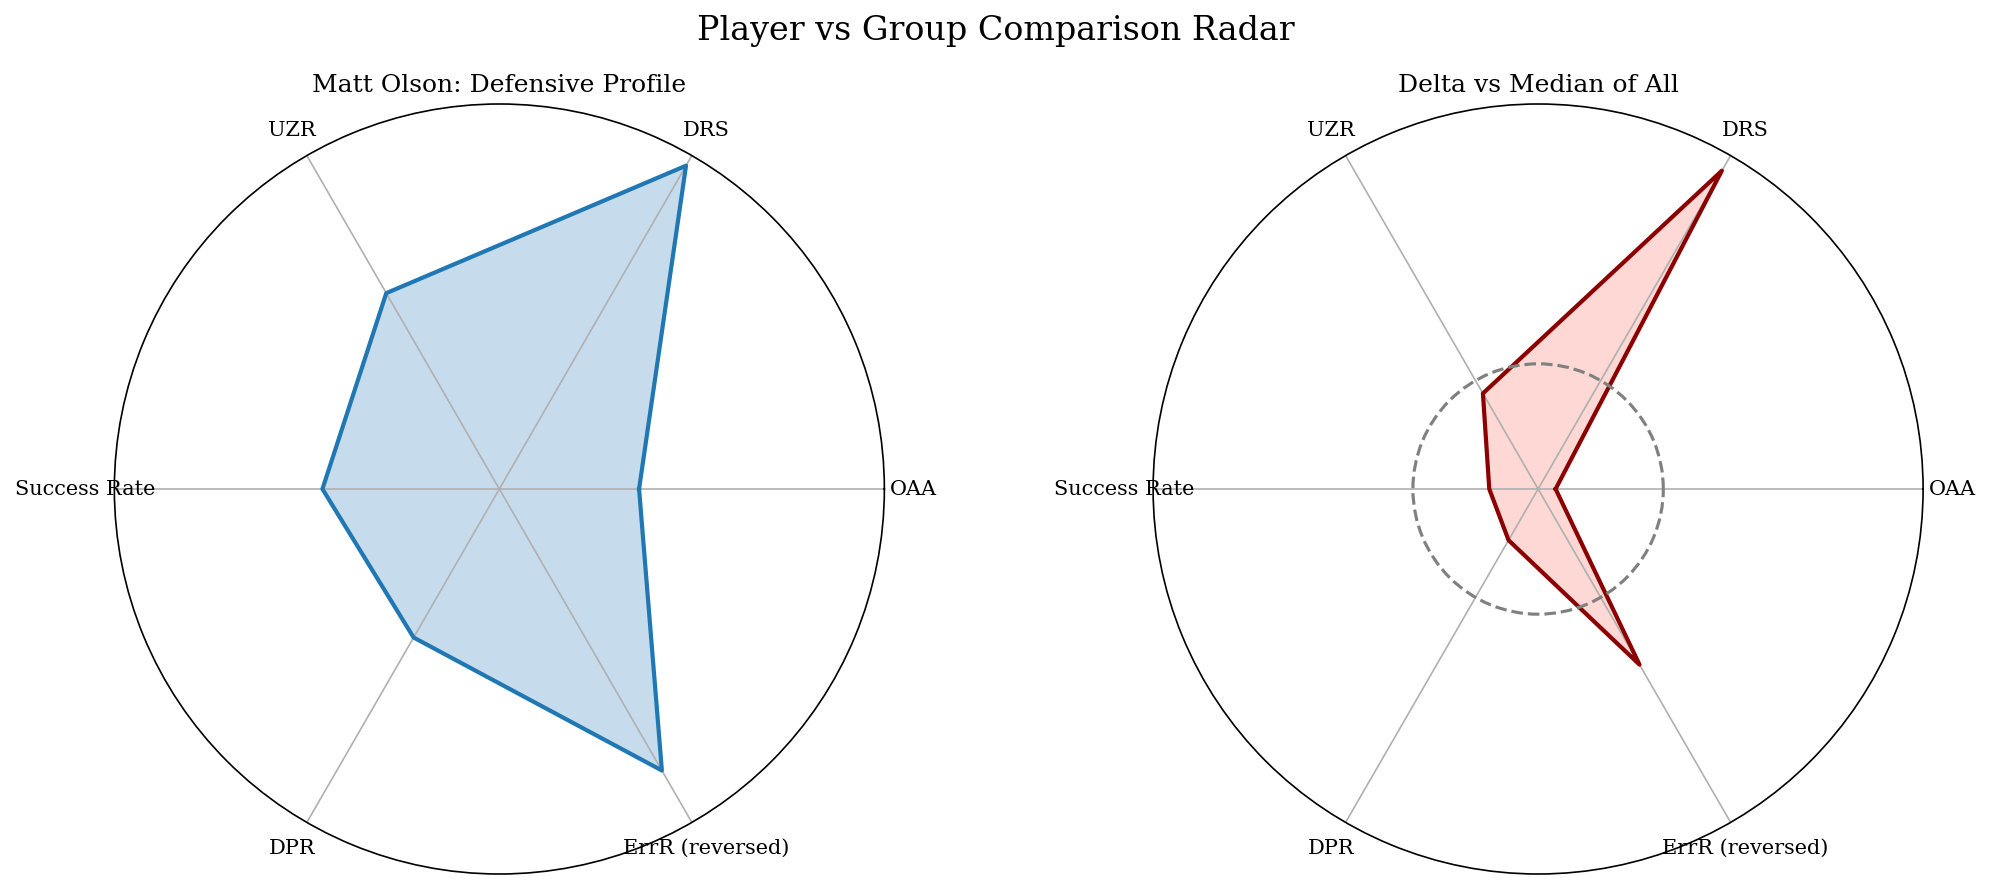

In [52]:
player   = 'Matt Olson'
df       = scooping_data
group    = 'all'
stat     = 'median'
top_n    = 5
save     = False
filename = None

metrics = ['OAA_scaled', 'DRS_scaled', 'UZR_scaled', 'success_rate_scaled', 'DPR_scaled', 'ErrR_scaled']
labels = ['OAA', 'DRS', 'UZR', 'Success Rate', 'DPR', 'ErrR (reversed)']
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

player_row = df[df['Player'] == player]
if player_row.empty:
    raise ValueError(f"Player '{player}' not found in dataset.")
player_vector = player_row[metrics].values[0]
player_vector_looped = np.append(player_vector, player_vector[0])

if group == 'all':
    comp_df = df.copy()
elif group == 'top':
    comp_df = df.sort_values('Combined_Score_With_Scooping', ascending=False).head(top_n)
elif group == 'bottom':
    comp_df = df.sort_values('Combined_Score_With_Scooping').head(top_n)
else:
    raise ValueError("group must be one of: 'all', 'top', or 'bottom'")

if stat == 'mean':
    comp_vector = comp_df[metrics].mean().values
elif stat == 'median':
    comp_vector = comp_df[metrics].median().values
else:
    raise ValueError("stat must be either 'mean' or 'median'")

comp_vector_looped = np.append(comp_vector, comp_vector[0])
delta_vector = player_vector - comp_vector
delta_vector_looped = np.append(delta_vector, delta_vector[0])

fig, axs = plt.subplots(1, 2, subplot_kw=dict(polar=True), figsize=(14, 6))

axs[0].plot(angles, player_vector_looped, label=player, linewidth=2)
axs[0].fill(angles, player_vector_looped, alpha=0.25)
axs[0].set_xticks(angles[:-1])
axs[0].set_xticklabels(labels)
axs[0].set_yticks([])
axs[0].set_title(f'{player}: Defensive Profile')
axs[0].grid(True)

axs[1].plot(angles, delta_vector_looped, label='Delta vs Group', color='darkred', linewidth=2)
axs[1].fill(angles, delta_vector_looped, color='salmon', alpha=0.3)
axs[1].axhline(0, color='gray', linestyle='--')
axs[1].set_xticks(angles[:-1])
axs[1].set_xticklabels(labels)
axs[1].set_yticks([])
axs[1].set_title(f'Delta vs {stat.title()} of {group.title() if group != "all" else "All"}{" (Top " + str(top_n) + ")" if group in ["top", "bottom"] else ""}')
axs[1].grid(True)

fig.suptitle("Player vs Group Comparison Radar", fontsize=16)
plt.tight_layout()

if save:
    if not filename:
        safe_name = player.replace(" ", "_")
        filename = f"radar_compare_{safe_name}_{group}_{stat}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Saved to: {filename}")
else:
    plt.show()

##### I think this really deserves a function

In [53]:
def radar_compare_to_group(player, df, group='all', stat='mean', top_n=5, save=False, filename=None):
    
    metrics = ['OAA_scaled', 'DRS_scaled', 'UZR_scaled', 'success_rate_scaled', 'DPR_scaled', 'ErrR_scaled']
    labels = ['OAA', 'DRS', 'UZR', 'Success Rate', 'DPR', 'ErrR (reversed)']
    angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]

    player_row = df[df['Player'] == player]
    if player_row.empty:
        raise ValueError(f"Player '{player}' not found in dataset.")
    player_vector = player_row[metrics].values[0]
    player_vector_looped = np.append(player_vector, player_vector[0])

    if group == 'all':
        comp_df = df.copy()
    elif group == 'top':
        comp_df = df.sort_values('Combined_Score_With_Scooping', ascending=False).head(top_n)
    elif group == 'bottom':
        comp_df = df.sort_values('Combined_Score_With_Scooping').head(top_n)
    else:
        raise ValueError("group must be one of: 'all', 'top', or 'bottom'")

    if stat == 'mean':
        comp_vector = comp_df[metrics].mean().values
    elif stat == 'median':
        comp_vector = comp_df[metrics].median().values
    else:
        raise ValueError("stat must be either 'mean' or 'median'")

    comp_vector_looped = np.append(comp_vector, comp_vector[0])
    delta_vector = player_vector - comp_vector
    delta_vector_looped = np.append(delta_vector, delta_vector[0])

    fig, axs = plt.subplots(1, 2, subplot_kw=dict(polar=True), figsize=(14, 6))

    axs[0].plot(angles, player_vector_looped, label=player, linewidth=2)
    axs[0].fill(angles, player_vector_looped, alpha=0.25)
    axs[0].set_xticks(angles[:-1])
    axs[0].set_xticklabels(labels)
    axs[0].set_yticks([])
    axs[0].set_title(f'{player}: Defensive Profile')
    axs[0].grid(True)

    axs[1].plot(angles, delta_vector_looped, label='Delta vs Group', color='darkred', linewidth=2)
    axs[1].fill(angles, delta_vector_looped, color='salmon', alpha=0.3)
    axs[1].axhline(0, color='k', linestyle='--')
    axs[1].set_xticks(angles[:-1])
    axs[1].set_xticklabels(labels)
    axs[1].set_yticks([])
    axs[1].set_title(f'Delta vs {stat.title()} of {group.title() if group != "all" else "All"}{" (Top " + str(top_n) + ")" if group in ["top", "bottom"] else ""}')
    axs[1].grid(True)

    fig.suptitle("Player vs Group Comparison Radar", fontsize=16)
    plt.tight_layout()

    if save:
        if not filename:
            safe_name = player.replace(" ", "_")
            filename = f"radar_compare_{safe_name}_{group}_{stat}.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Saved to: {filename}")
    else:
        plt.show()

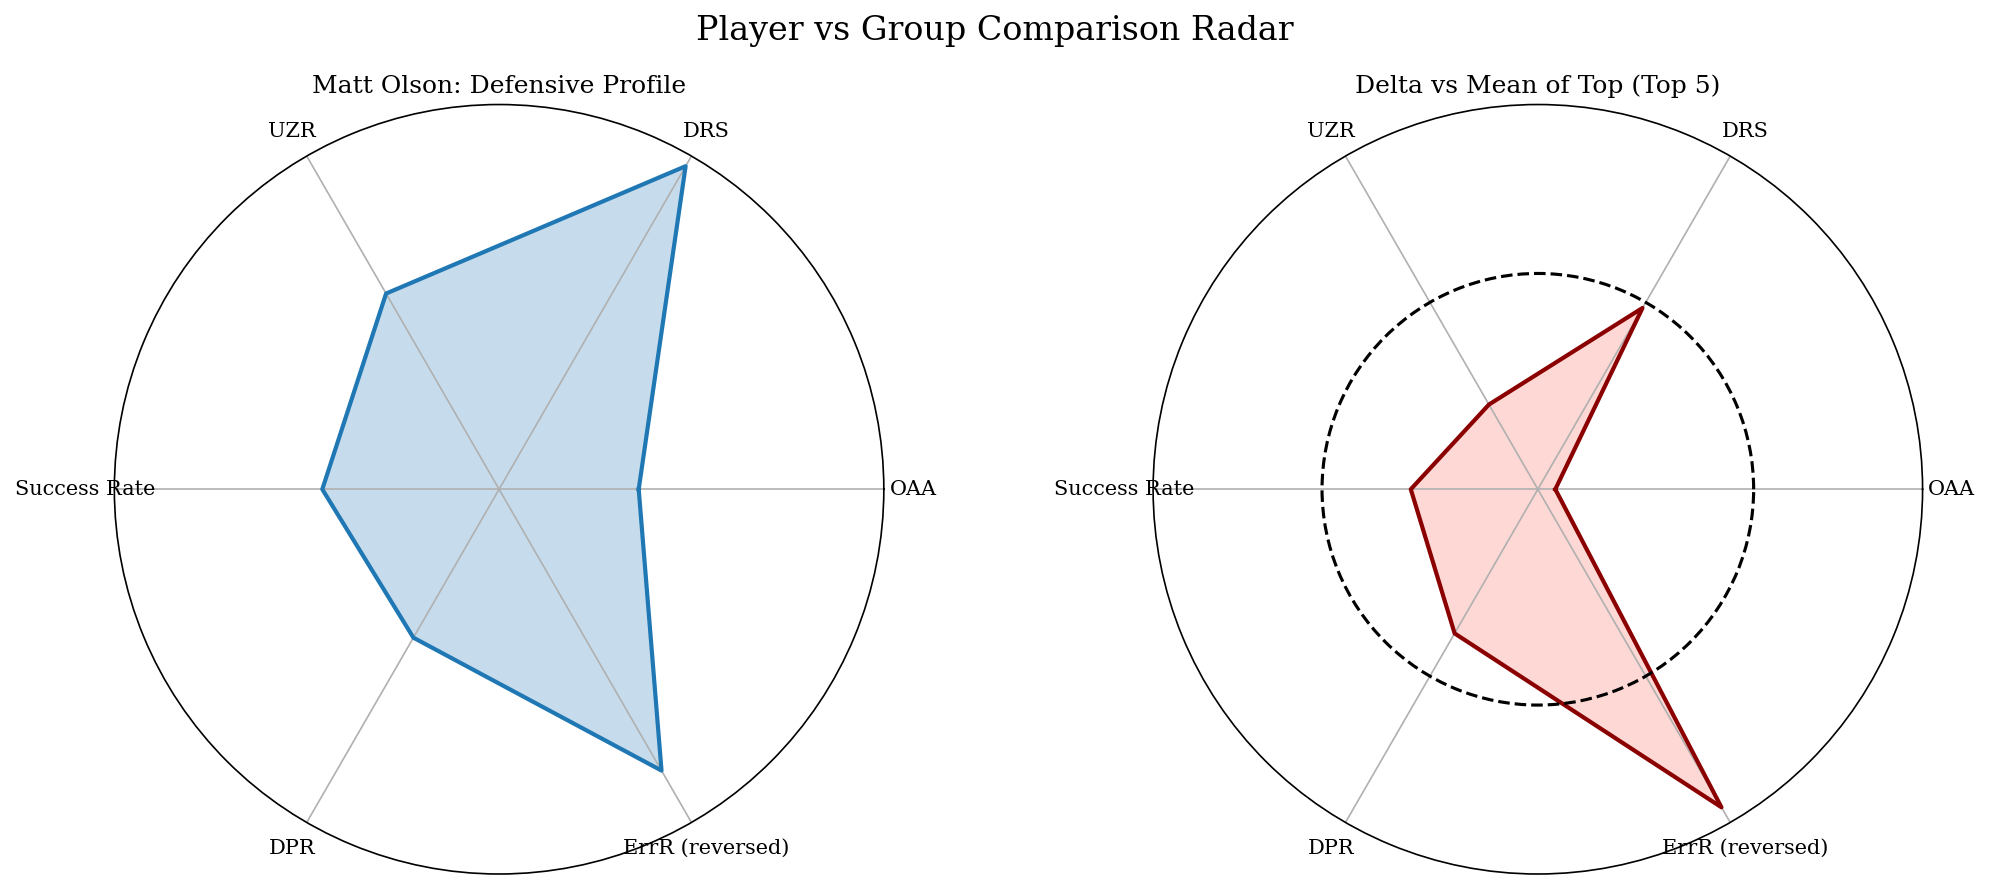

In [54]:
radar_compare_to_group('Matt Olson', scooping_data, group='top', stat='mean', top_n=5)

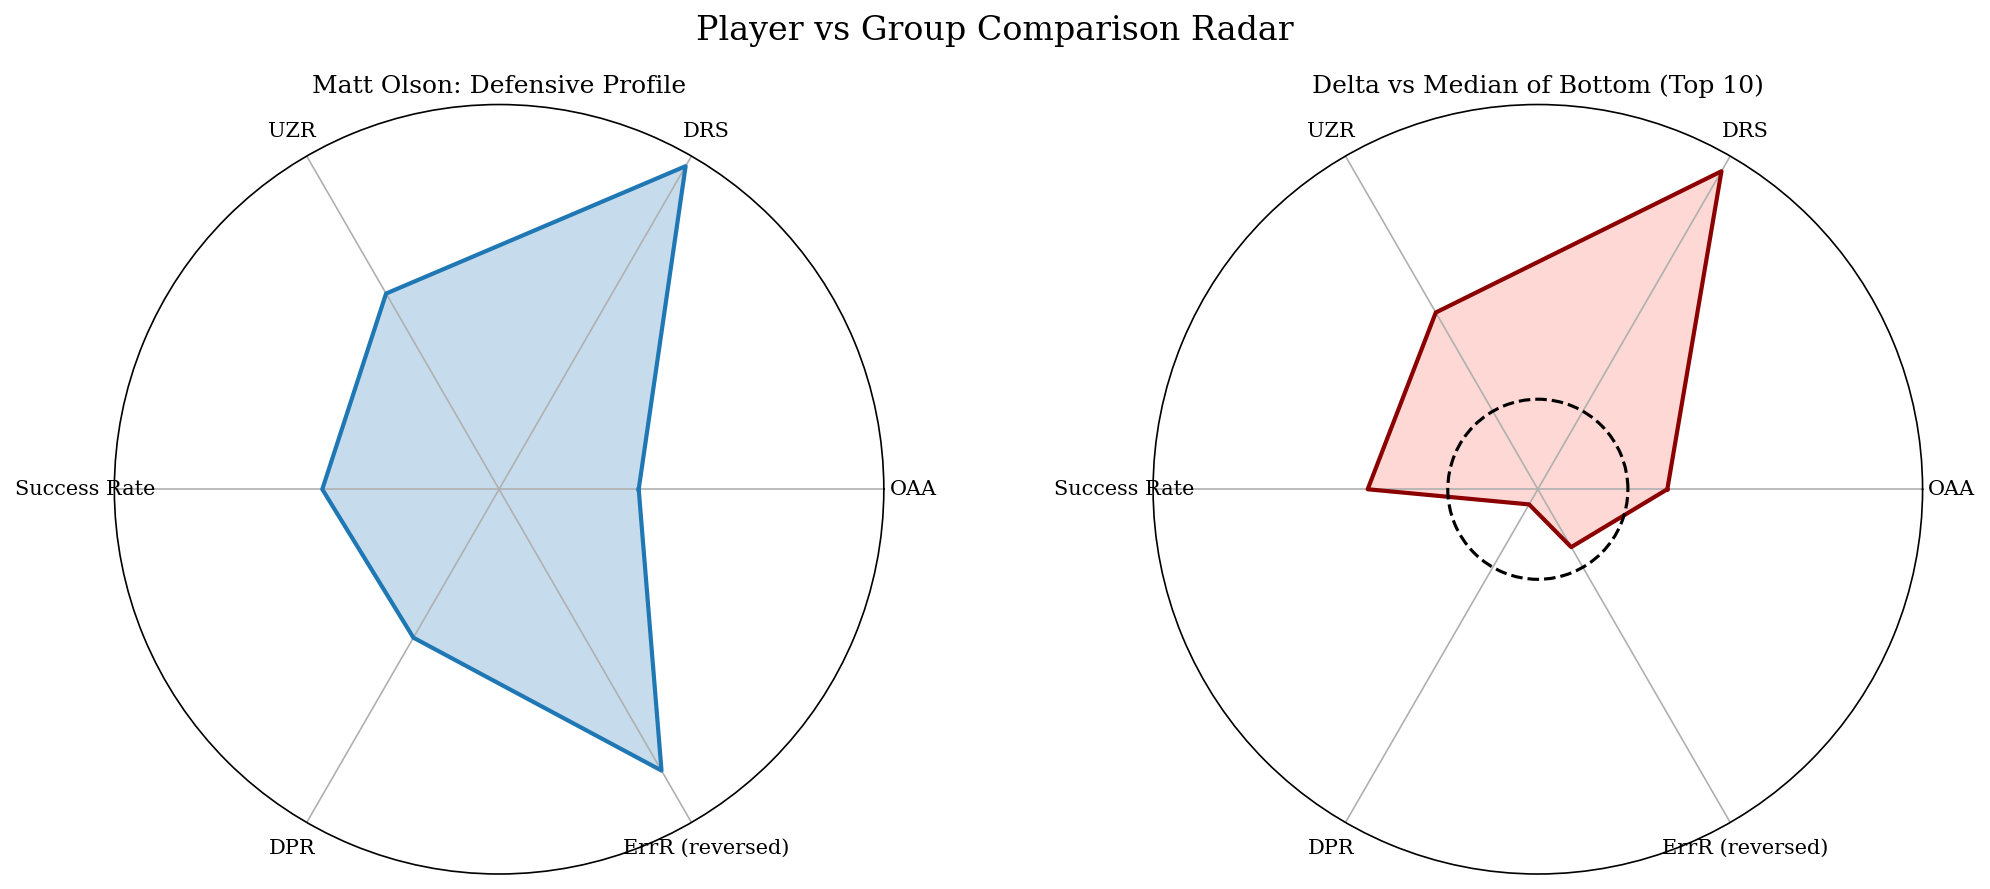

In [55]:
radar_compare_to_group('Matt Olson', scooping_data, group='bottom', stat='median', top_n=10)

##### I'm thinking circular bar plots might look better, and might be a notable improvement when displaying the 'deltas'

In [56]:
fld_2023 = pd.read_csv('drs_2023_basic.csv')
fld_2024 = pd.read_csv('drs_2024_basic.csv')

fld_2023['Season'] = 2023
fld_2024['Season'] = 2024

fld_all = pd.concat([fld_2023, fld_2024], ignore_index=True)
fld_all = fld_all[['Name', 'Season', 'Inn', 'FP', 'PO', 'A', 'E']]
fld_all.columns = ['Player', 'Season', 'Innings', 'FieldingPct', 'Putouts', 'Assists', 'Errors']
fld_all['FieldingPct'] = pd.to_numeric(fld_all['FieldingPct'], errors='coerce')

defense_combined = defense_combined.drop(columns=['Innings'], errors='ignore')

defense_combined = defense_combined.merge(
    fld_all,
    on=['Player', 'Season'],
    how='left'
)

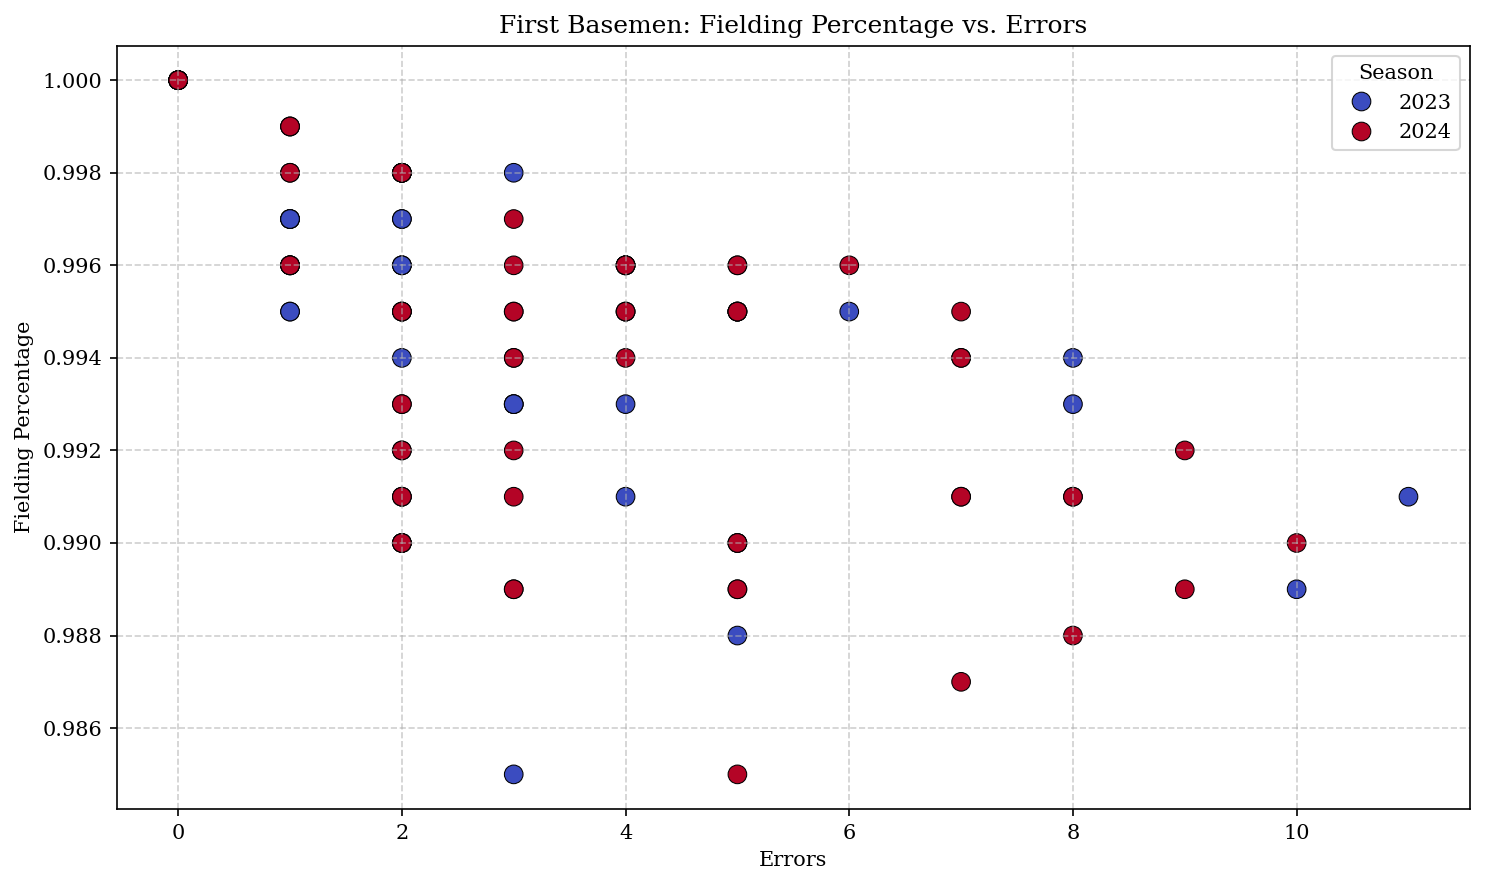

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=defense_combined, x='Errors', y='FieldingPct', hue='Season', palette='coolwarm', edgecolor='k', s=80, linewidth=0.5)

plt.title('First Basemen: Fielding Percentage vs. Errors')
plt.xlabel('Errors')
plt.ylabel('Fielding Percentage')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

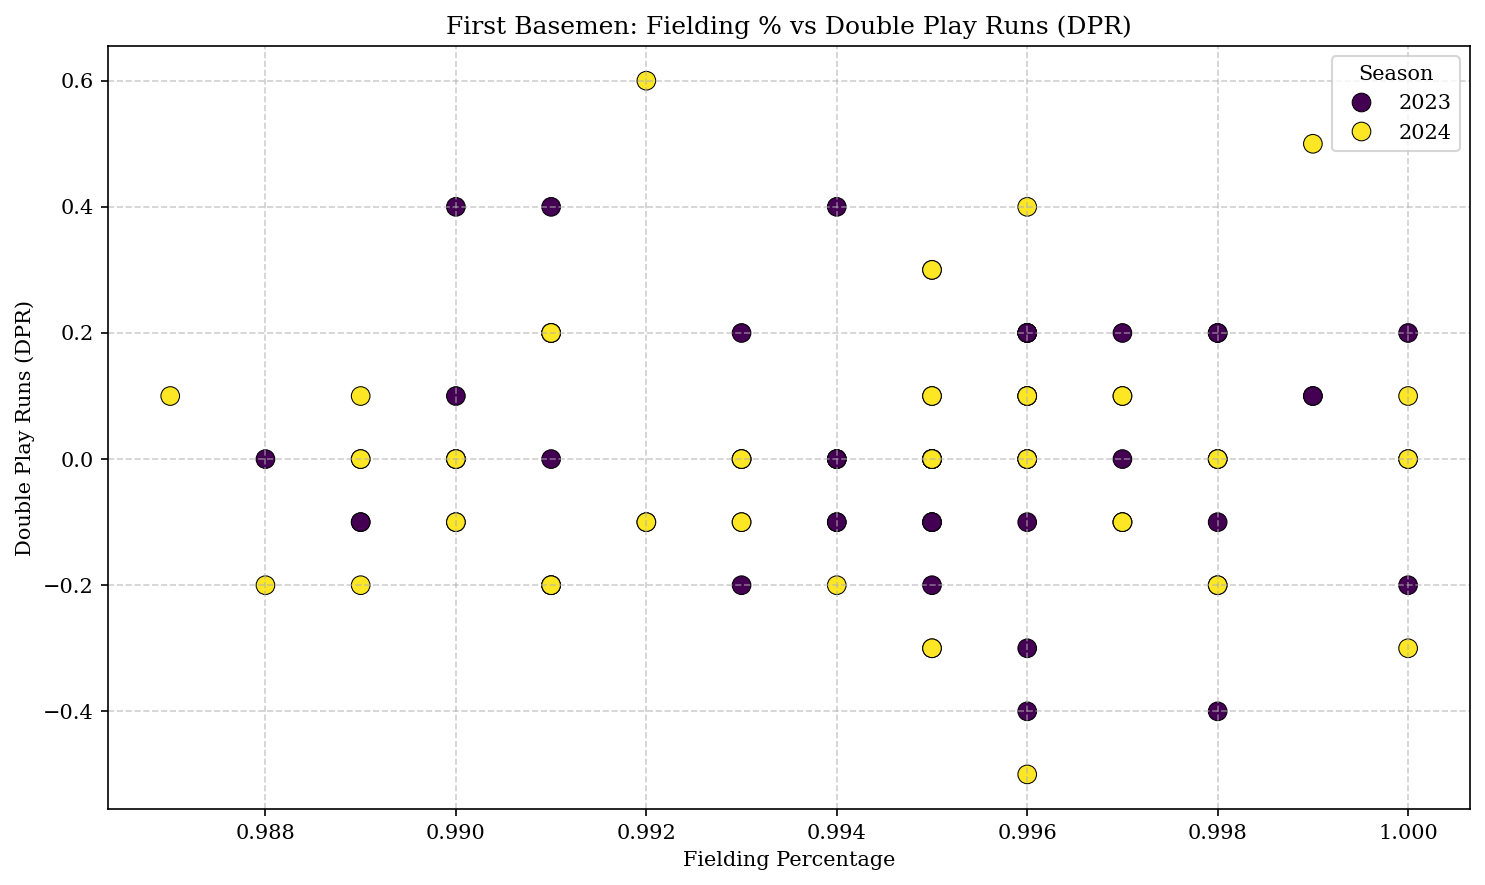

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=defense_combined, x='FieldingPct', y='DPR', hue='Season', palette='viridis', edgecolor='k', s=80, linewidth=0.5)

plt.title('First Basemen: Fielding % vs Double Play Runs (DPR)')
plt.xlabel('Fielding Percentage')
plt.ylabel('Double Play Runs (DPR)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [59]:
metrics = ['OAA', 'DRS', 'UZR', 'success_rate', 'DPR', 'ErrR']
defense_cleaned = defense_combined.copy()

for metric in metrics:
    defense_cleaned[metric] = pd.to_numeric(defense_cleaned[metric], errors='coerce')

defense_cleaned = defense_cleaned.dropna(subset=metrics).copy()

for metric in metrics:
    defense_cleaned[f'z_{metric}'] = zscore(defense_cleaned[metric])

defense_cleaned['Combined_Score'] = (
    defense_cleaned['z_OAA'] +
    defense_cleaned['z_DRS'] +
    defense_cleaned['z_UZR'] +
    0.5 * defense_cleaned['z_success_rate'] +
    0.25 * defense_cleaned['z_DPR'] +
    0.25 * defense_cleaned['z_ErrR']
)

leaderboard = defense_cleaned[['Player', 'Season', 'Combined_Score'] + [f'z_{m}' for m in metrics]].sort_values(by='Combined_Score', ascending=False).reset_index(drop=True)

In [60]:
# This leaderboard treats season's individually. Could also create one where each player's seasons are combined

leaderboard

Player  Season  Combined_Score     z_OAA     z_DRS  \
0        Christian Walker    2024        6.975831  2.479457  1.242302   
1        Christian Walker    2023        6.319196  2.301236  1.612074   
2          Carlos Santana    2024        5.635170  2.657678  1.427188   
3           Dominic Smith    2023        5.189060  0.340808  0.872531   
4        Ryan Mountcastle    2024        3.260456  0.519029  1.427188   
5              Matt Olson    2024        3.019855  0.875470  2.351617   
6              Joey Gallo    2024        2.839233  0.697250  1.242302   
7            Bryce Harper    2024        2.683254  1.588353  0.872531   
8               C.J. Cron    2023        2.332424  0.519029 -0.051898   
9           Wilmer Flores    2023        2.240306  0.340808  1.057417   
10         Garrett Cooper    2023        1.988056  0.875470  0.132988   
11         Carlos Santana    2023        1.834412  0.519029  1.981845   
12          Michael Busch    2024        1.649776  0.519029  0.872531   
13       Ryan Mountcastle    2023        1.616520 -0.015633  0.317874   
14          Anthony Rizzo    2024        1.373255 -0.372075  0.317874   
15           Ryan O'Hearn    2023        1.356277  0.875470 -0.421669   
16       Jake Cronenworth    2023        1.050818 -0.372075  0.132988   
17      Spencer Torkelson    2024        0.908162  0.340808  0.317874   
18       Paul Goldschmidt    2023        0.845117  0.697250  0.502759   
19          Andrew Vaughn    2023        0.767555 -1.084958 -0.051898   
20            Josh Naylor    2023        0.629793  1.053691 -0.051898   
21             Connor Joe    2024        0.586943  0.519029  0.317874   
22       Paul Goldschmidt    2024        0.502134  0.162587 -0.051898   
23          Anthony Rizzo    2023        0.440684  1.231912  0.502759   
24           Rowdy Tellez    2023        0.431349 -0.193854 -0.051898   
25             Matt Olson    2023        0.110877 -0.728516  1.427188   
26       Elehuris Montero    2023        0.105361 -0.193854  0.502759   
27           Rowdy Tellez    2024        0.100249 -0.728516 -0.606555   
28            Josh Naylor    2024        0.055819  0.162587 -1.161212   
29             Connor Joe    2023       -0.170340  0.340808 -0.421669   
30        Freddie Freeman    2024       -0.178951  0.340808  0.132988   
31            DJ LeMahieu    2023       -0.181128 -0.193854  0.317874   
32          Wilmer Flores    2024       -0.192271 -0.015633 -0.421669   
33           Yuli Gurriel    2023       -0.210421 -0.193854 -0.236783   
34        Freddie Freeman    2023       -0.237687  0.875470 -1.715869   
35              Ty France    2023       -0.259276 -0.015633 -1.346098   
36       Jake Cronenworth    2024       -0.372085  0.697250 -0.051898   
37            Pete Alonso    2023       -0.465193 -0.015633  1.057417   
38            Nick Pratto    2023       -0.790669 -0.550296 -1.161212   
39          Andrew Vaughn    2024       -0.829753 -1.441399 -0.791441   
40         Michael Toglia    2024       -1.295478 -0.550296  1.796959   
41           Rhys Hoskins    2024       -1.404578 -0.728516 -0.606555   
42          Dominic Smith    2024       -1.601163  0.519029 -0.421669   
43       Tyler Soderstrom    2024       -1.680295 -0.372075 -0.606555   
44            Jake Bauers    2024       -1.824193  0.162587 -0.236783   
45         Donovan Solano    2023       -2.137872 -0.193854 -0.421669   
46            Pete Alonso    2024       -2.440253 -1.441399 -0.606555   
47              Ty France    2024       -2.959292 -1.976062 -1.346098   
48              Josh Bell    2024       -3.138105 -1.441399 -1.715869   
49       Elehuris Montero    2024       -3.163284 -0.728516 -0.606555   
50              Alec Bohm    2023       -3.209902 -0.906737 -0.421669   
51            Luis Arraez    2024       -4.039424 -0.906737 -0.606555   
52  Vladimir Guerrero Jr.    2024       -4.233286 -1.441399 -0.236783   
53         Alex Kirilloff    2023       -4.487129 -1.084958 -1.530983   
54  

In [61]:
print(leaderboard.head(10))

             Player  Season  Combined_Score     z_OAA     z_DRS     z_UZR  \
0  Christian Walker    2024        6.975831  2.479457  1.242302  2.142254   
1  Christian Walker    2023        6.319196  2.301236  1.612074  1.728151   
2    Carlos Santana    2024        5.635170  2.657678  1.427188  0.899946   
3     Dominic Smith    2023        5.189060  0.340808  0.872531  2.556356   
4  Ryan Mountcastle    2024        3.260456  0.519029  1.427188  0.848184   
5        Matt Olson    2024        3.019855  0.875470  2.351617 -0.031784   
6        Joey Gallo    2024        2.839233  0.697250  1.242302  0.537607   
7      Bryce Harper    2024        2.683254  1.588353  0.872531  0.641132   
8         C.J. Cron    2023        2.332424  0.519029 -0.051898  0.589370   
9     Wilmer Flores    2023        2.240306  0.340808  1.057417  0.692895   

   z_success_rate     z_DPR    z_ErrR  
0        1.206384 -0.024891  2.059394  
1        1.206384 -1.916633  2.214803  
2        0.982805 -0.024891  0.6

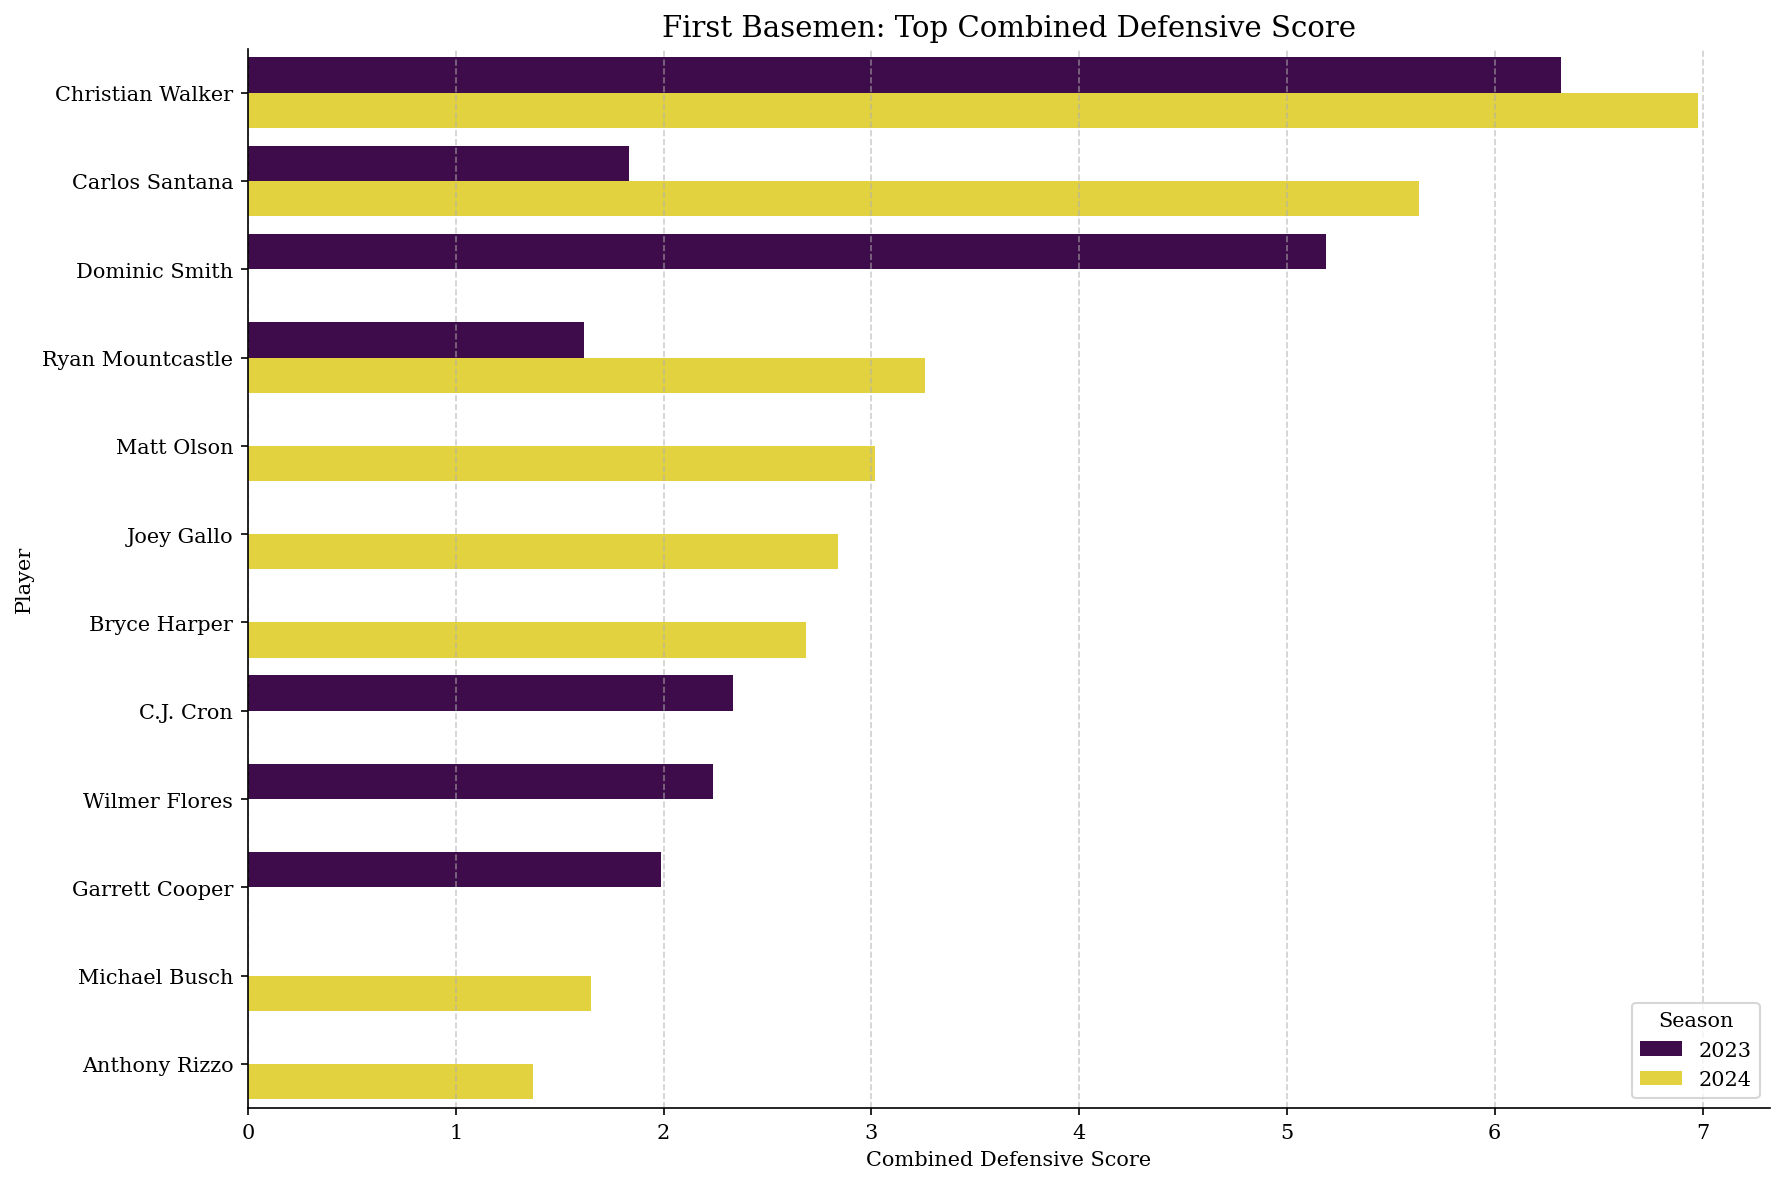

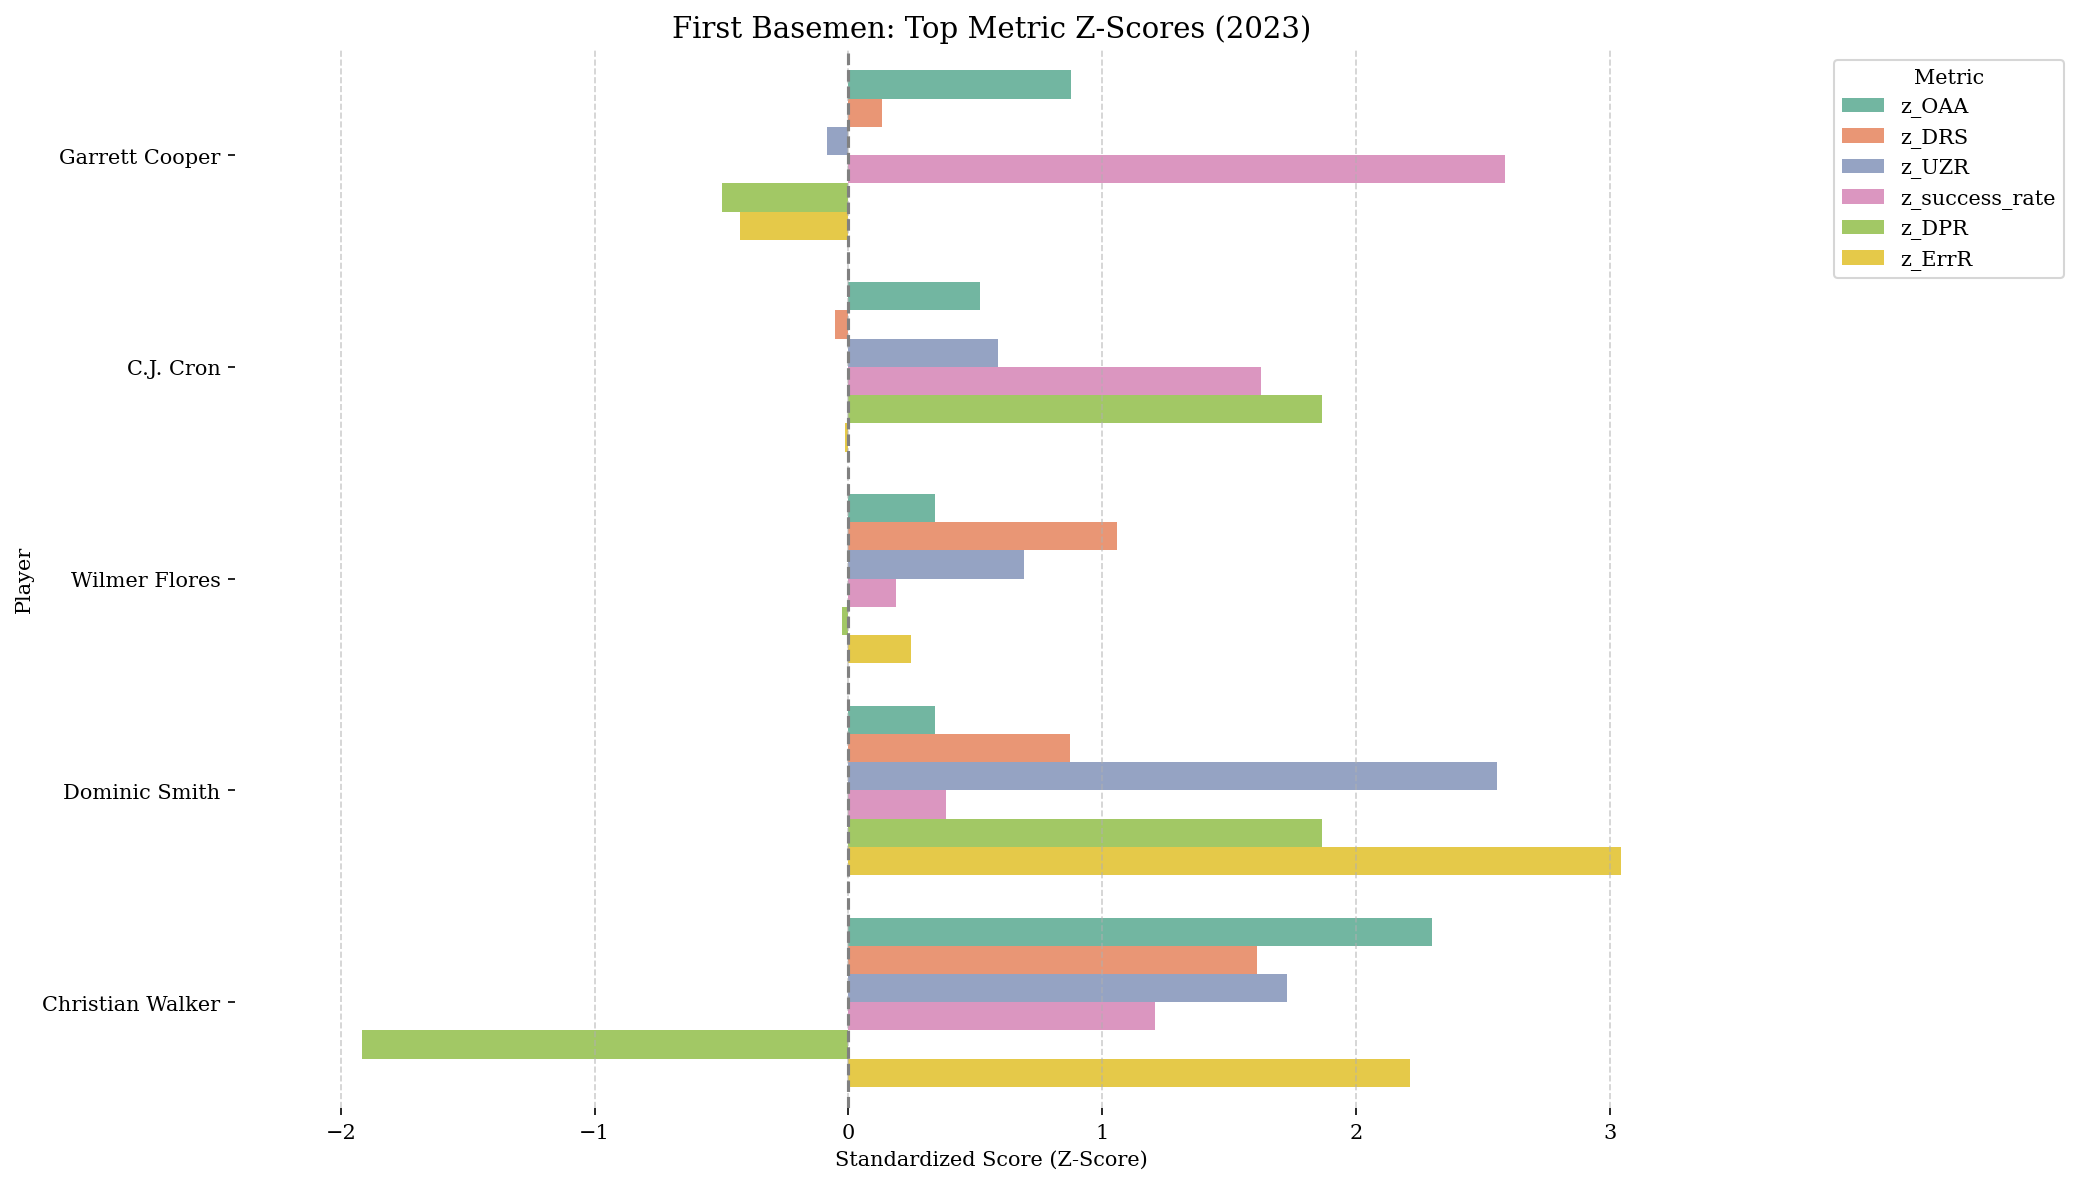

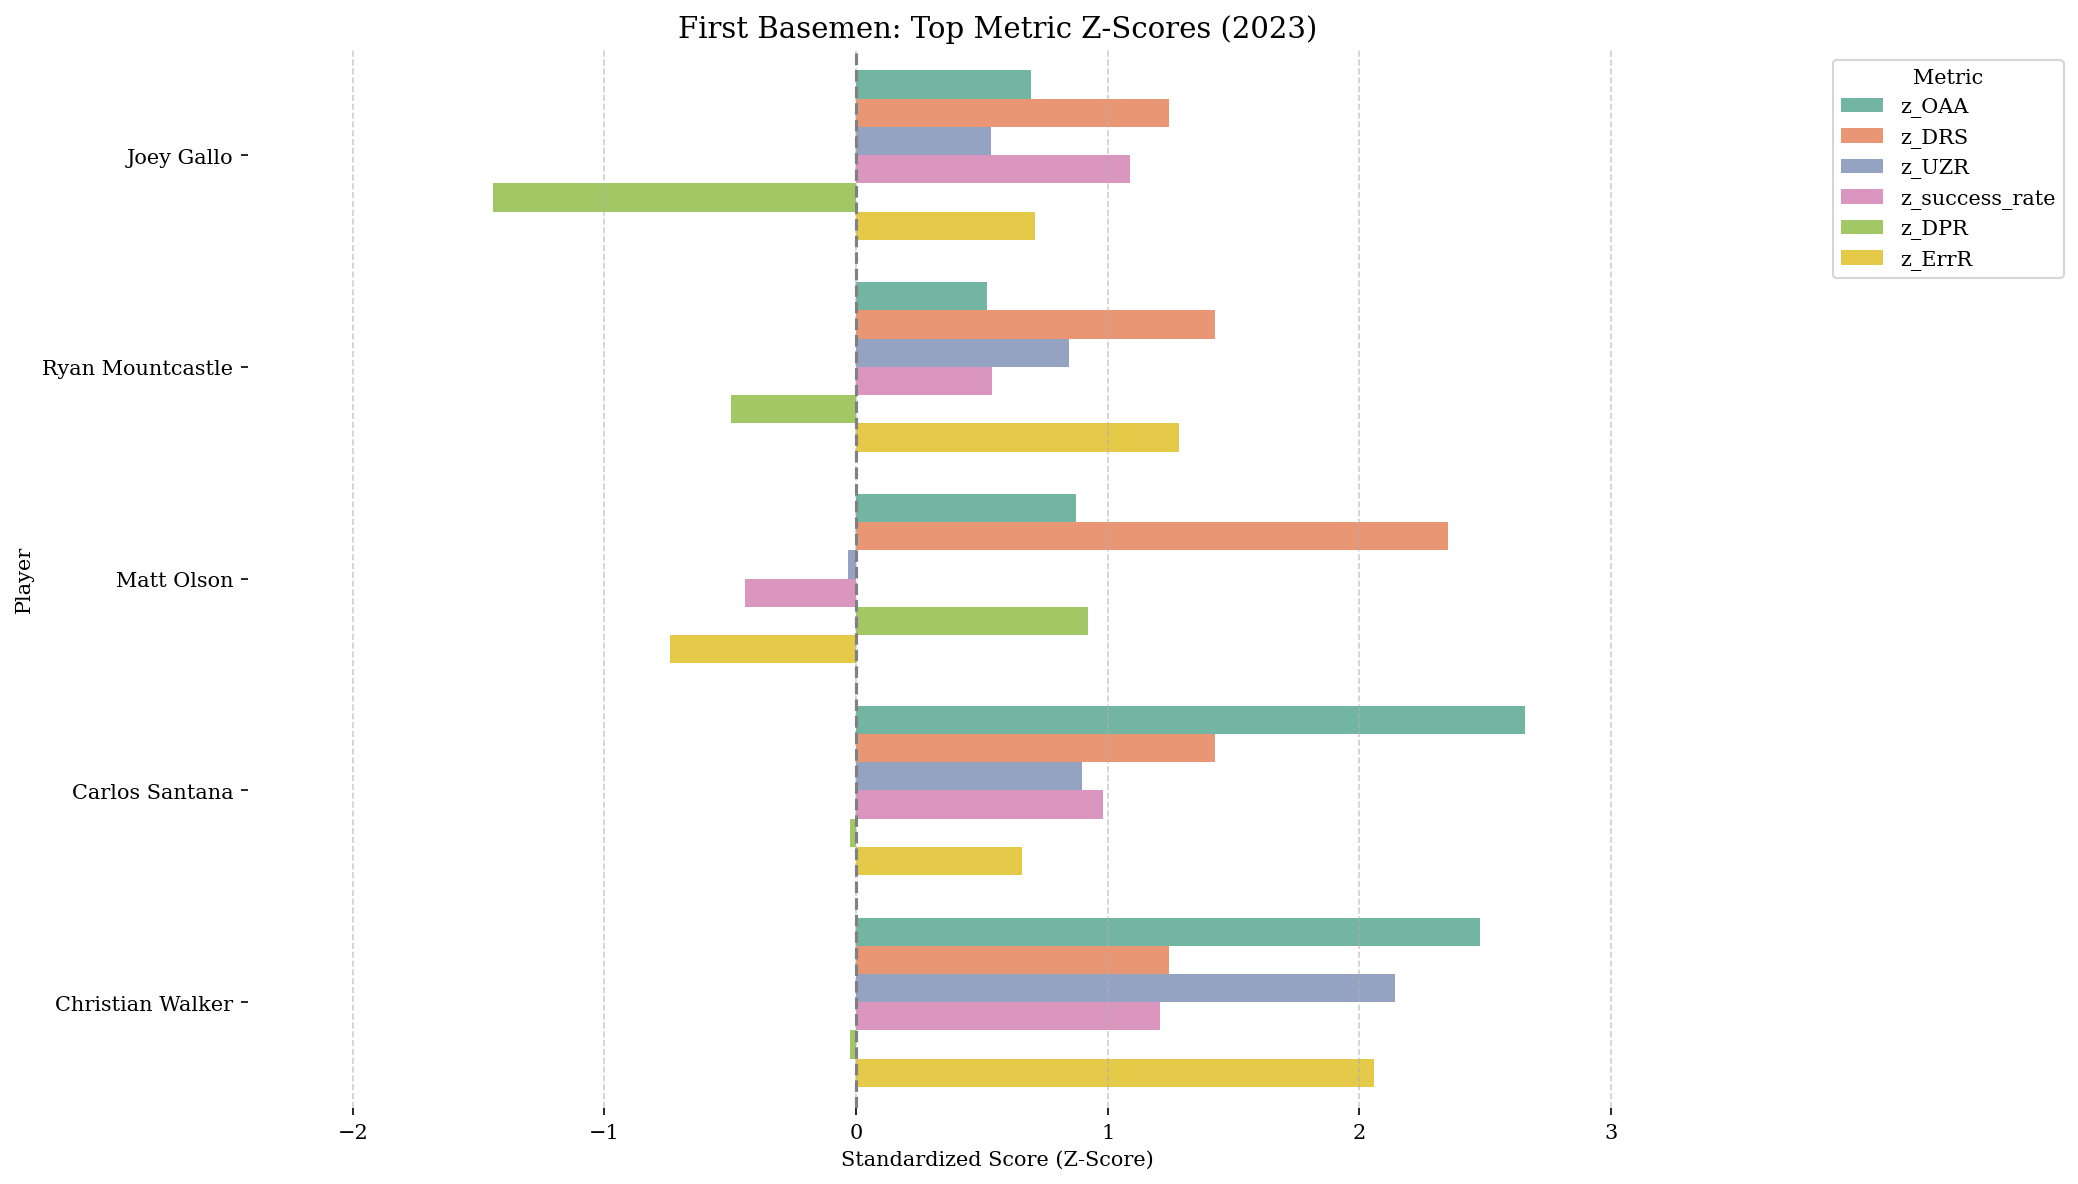

In [62]:
plt.figure(figsize=(12, 8))
top_players = leaderboard.head(15)
sns.barplot(data=top_players, x="Combined_Score", y="Player", hue="Season", dodge=True, palette="viridis")
plt.title("First Basemen: Top Combined Defensive Score", fontsize=14)
plt.xlabel("Combined Defensive Score")
plt.ylabel("Player")
plt.grid(axis="x", linestyle="--", alpha=0.6)

for spine in ["right", "top"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

top5_2023 = leaderboard[leaderboard["Season"] == 2023].head(5)["Player"]
top5_2024 = leaderboard[leaderboard["Season"] == 2024].head(5)["Player"]

top5_2023_data = defense_cleaned[(defense_cleaned["Season"] == 2023) & (defense_cleaned["Player"].isin(top5_2023))].copy()
top5_2024_data = defense_cleaned[(defense_cleaned["Season"] == 2024) & (defense_cleaned["Player"].isin(top5_2024))].copy()

melted_2023 = top5_2023_data.melt(id_vars=["Player"], value_vars=[f'z_{m}' for m in metrics], var_name="Metric", value_name="Z-Score")
melted_2024 = top5_2024_data.melt(id_vars=["Player"], value_vars=[f'z_{m}' for m in metrics], var_name="Metric", value_name="Z-Score")

combined = pd.concat([melted_2023["Z-Score"], melted_2024["Z-Score"]])
xmin, xmax = combined.min(), combined.max()
buffer = 0.5
xlim = (xmin - buffer, xmax + buffer)

plt.figure(figsize=(14, 8))
sns.barplot(data=melted_2023, x="Z-Score", y="Player", hue="Metric", palette="Set2", dodge=True)
plt.axvline(0, color='gray', linestyle='--')
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.title("First Basemen: Top Metric Z-Scores (2023)", fontsize=14)
plt.xlabel("Standardized Score (Z-Score)")
plt.ylabel("Player")
plt.xlim(xlim)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')

for spine in ["right", "left", "top", "bottom"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(data=melted_2024, x="Z-Score", y="Player", hue="Metric", palette="Set2", dodge=True)
plt.axvline(0, color='gray', linestyle='--')
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.title("First Basemen: Top Metric Z-Scores (2023)", fontsize=14)
plt.xlabel("Standardized Score (Z-Score)")
plt.ylabel("Player")
plt.xlim(xlim)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')

for spine in ["right", "left", "top", "bottom"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

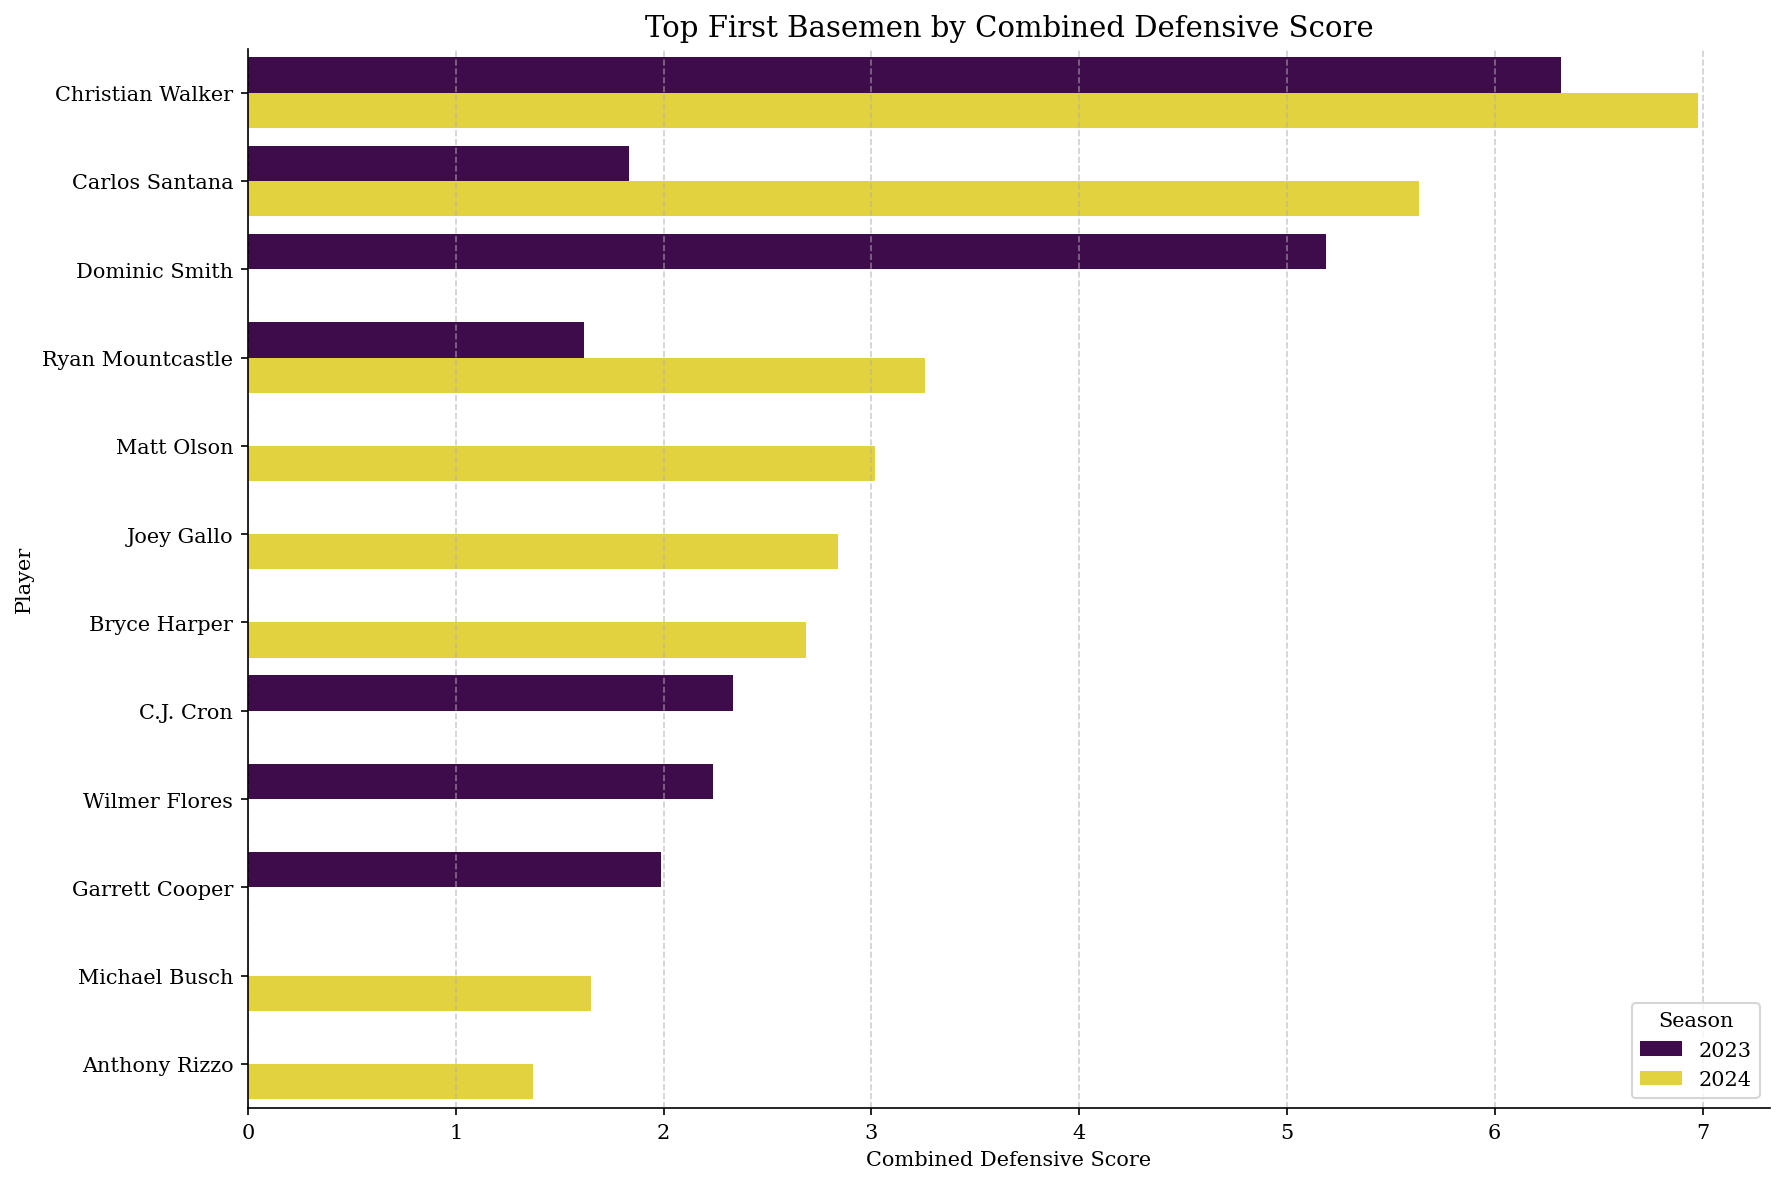

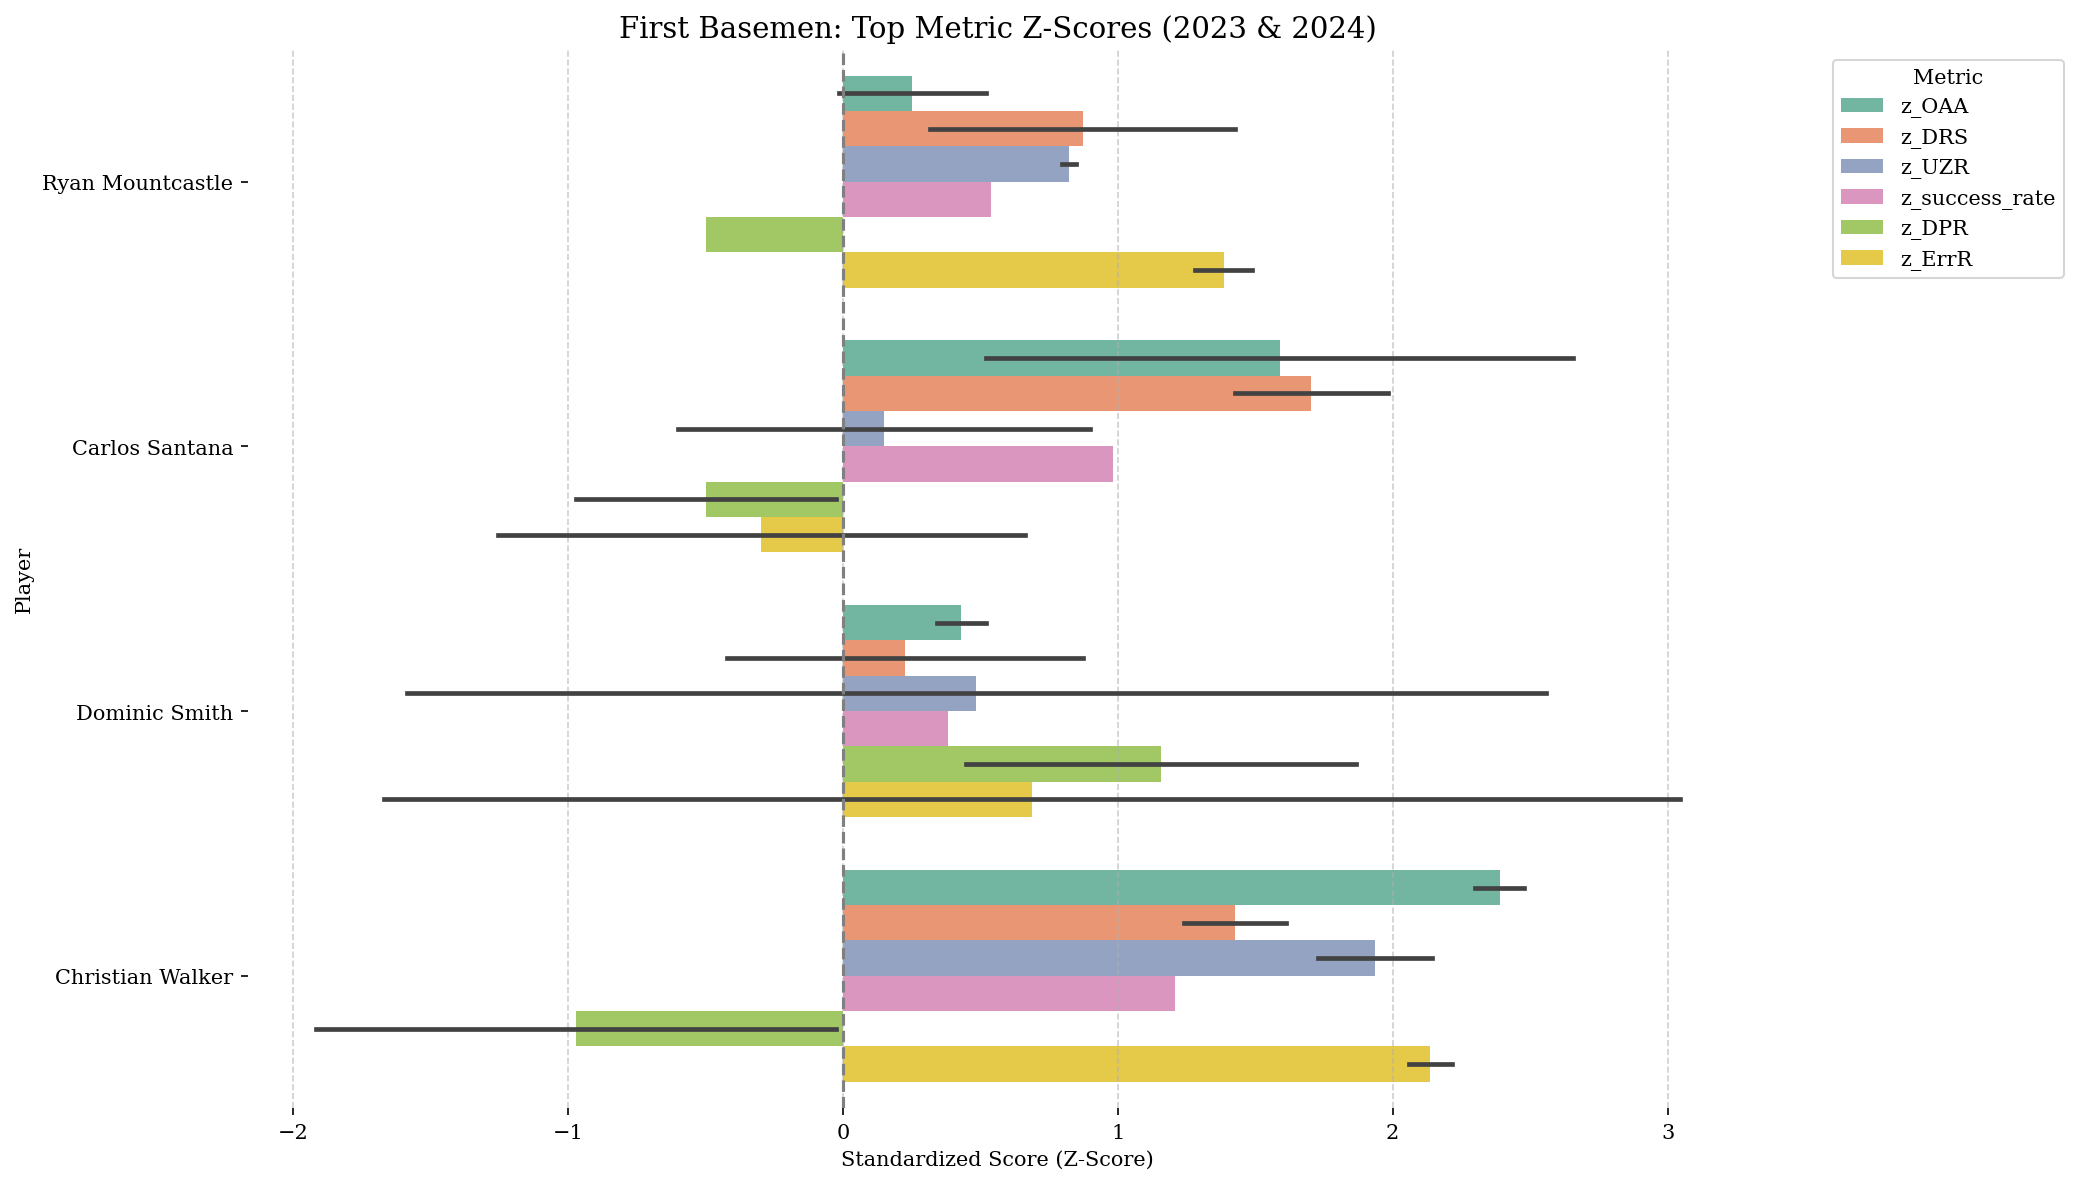

In [63]:
plt.figure(figsize=(12, 8))
top_players = leaderboard.head(15)
sns.barplot(data=top_players, x="Combined_Score", y="Player", hue="Season", dodge=True, palette="viridis")
plt.title("Top First Basemen by Combined Defensive Score", fontsize=14)
plt.xlabel("Combined Defensive Score")
plt.ylabel("Player")
plt.grid(axis="x", linestyle="--", alpha=0.6)

for spine in ["right", "top"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

# Or we can show a plot of the averages with the 'error bar' showing the differences in seasons
top5_names = leaderboard.head(5)["Player"]
top5_data = defense_cleaned[defense_cleaned["Player"].isin(top5_names)].copy()
melted = top5_data.melt(id_vars=["Player", "Season"], value_vars=[f'z_{m}' for m in metrics], var_name="Metric", value_name="Z-Score")

plt.figure(figsize=(14, 8))
sns.barplot(data=melted, x="Z-Score", y="Player", hue="Metric", palette="Set2", dodge=True)
plt.axvline(0, color='gray', linestyle='--')
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.title("First Basemen: Top Metric Z-Scores (2023 & 2024)", fontsize=14)
plt.xlabel("Standardized Score (Z-Score)")
plt.ylabel("Player")
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')

for spine in ["right", "left", "top", "bottom"]:
    plt.gca().spines[spine].set_visible(False)
    
plt.tight_layout()
plt.show()

####  Golden Gloves begin to make sense